In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('archive/dataset_olympics.csv')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
69996,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.0,65.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",NaN
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.0,65.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN


In [3]:
# SEE A RANDOM SAMPLE OF THE DATASET
df.sample(5)
#df.head(5)
#df.tail(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
11438,6247,Alain Ayissi,M,22.0,NaN,NaN,Cameroon,CMR,1984 Summer,1984,Summer,Los Angeles,Cycling,"Cycling Men's Road Race, Individual",NaN
26093,13605,Paul Borowski,M,31.0,172.0,83.0,East Germany,GDR,1968 Summer,1968,Summer,Mexico City,Sailing,Sailing Mixed Three Person Keelboat,Bronze
52436,26943,Bernard Decoux,M,19.0,164.0,60.0,France,FRA,1976 Summer,1976,Summer,Montreal,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
25876,13502,Vladimir Fyodorovich Borisenko,M,NaN,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 200 metres Breaststroke,NaN
43130,22242,Corey Cogdell-Unrein,F,21.0,173.0,70.0,United States,USA,2008 Summer,2008,Summer,Beijing,Shooting,Shooting Women's Trap,Bronze


In [4]:
#VIEW COLUMNS BYT THEIR SPECIFIC TYPE

df.describe(include =["object"])
#df.describe(include =["int"])
#df.describe(include =["float"])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,9690
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51877,4979,5216,3675,58467,6034,10629,1738,3292


In [5]:
#CHECK ALL TYPES OF THE COLUMNS, AND EXAMPLES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [6]:
#Add some styles to you table
df.head().style.set_properties(**{"background-color": "#738bf2","color":"#fff","border": "1.5px solid black"})

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.000000,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,nan
1,2,A Lamusi,M,23.000000,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan
2,3,Gunnar Nielsen Aaby,M,24.000000,nan,nan,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,nan
3,4,Edgar Lindenau Aabye,M,34.000000,nan,nan,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.000000,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,nan


In [7]:
#SHAPE OF THE DATAFRAME
df.shape

(70000, 15)

In [8]:
n_rows, n_columns = df.shape
print(f'The dataset contains {n_rows} rows and {n_columns} columns')

The dataset contains 70000 rows and 15 columns


In [9]:
#FUNCTION THAT RETURN INFORMATION ABOUT THE DATAFRAME: UNIQUE VALUES,DATATYPES,MISSING VALUES, % MISSING VALUES
#MIN,MAX AND AVG VALUES FOR ALL COLUMNS
def summary(data):
    summ = pd.DataFrame()
    summ['dataTypes'] = data.dtypes
    summ['Total'] = data.count()
    summ['unique'] = data.nunique()
    summ['missing'] = data.isnull().sum()
    summ['missing%'] = data.isnull().sum() / len(data) * 100
    stats = data.describe().transpose()
    summ['min'] = stats['min']
    summ['max'] = stats['max']
    summ['avg'] = stats['mean']
    summ['standard deveiation'] = stats['std']
    return summ

summary(df).style.background_gradient(cmap = 'Greens').highlight_null(color='purple')

,dataTypes,Total,unique,missing,missing%,min,max,avg,standard deveiation
ID,int64,70000,35658,0,0.000000,1.000000,35658.000000,18081.846986,10235.613253
Name,object,70000,35556,0,0.000000,nan,nan,nan,nan
Sex,object,70000,2,0,0.000000,nan,nan,nan,nan
Age,float64,67268,68,2732,3.902857,11.000000,88.000000,25.644645,6.485239
Height,float64,53746,87,16254,23.220000,127.000000,223.000000,175.505303,10.384203
Weight,float64,52899,173,17101,24.430000,25.000000,214.000000,70.900216,14.217489
Team,object,70000,827,0,0.000000,nan,nan,nan,nan
NOC,object,70000,226,0,0.000000,nan,nan,nan,nan
Games,object,70000,51,0,0.000000,nan,nan,nan,nan
Year,int64,70000,35,0,0.000000,1896.000000,2016.000000,1977.766457,30.103306


# Cleaning my dataframe

In [10]:
# FIND COLUMNS WITH MISSING VALUES

cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]
cols_with_missing 

['Age', 'Height', 'Weight', 'Medal']

In [11]:
# CHECK ALL COLUMNS FOR MISSING VALUES
df.isnull().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [12]:
#FIND THE ENIQUE VALUES IN ALL COLUMNS

for column in df.select_dtypes(include="O"):
    print(f"Number of Unique Values in ({column} Column) are :{df[column].nunique()}")

Number of Unique Values in (Name Column) are :35556
Number of Unique Values in (Sex Column) are :2
Number of Unique Values in (Team Column) are :827
Number of Unique Values in (NOC Column) are :226
Number of Unique Values in (Games Column) are :51
Number of Unique Values in (Season Column) are :2
Number of Unique Values in (City Column) are :42
Number of Unique Values in (Sport Column) are :65
Number of Unique Values in (Event Column) are :744
Number of Unique Values in (Medal Column) are :3


In [13]:
# SEE THE UNIQUE VALUE IN THE COLUMN 

# print(df["Sex"].nunique()) # number
print(df["Sex"].unique())# array with values

['M' 'F']


In [14]:
# CHECKING FOR DUPLICATES

df.duplicated().sum()

383

In [15]:
# DROPING THE DUPLICATED VALUES AND CHECKING THE RESULTS
df.drop_duplicates(inplace = True)

print(df.duplicated().sum())
df.shape

0


(69617, 15)

In [16]:
# Find missing values in AGE column
missing_age = df['Age'].isna().sum()

print("Missing values in Age:", missing_age)
print("\n")

Missing values in Age: 2671




In [17]:
# Calculate the average of each column
average_age = df['Age'].mean()
average_age

25.54425955247513

In [18]:
# Replace missing values with the corresponding column average
df['Age'].fillna(average_age, inplace=True) # inplace=True changes directly the dataframe
missing_age = df['Age'].isna().sum()
missing_age

0

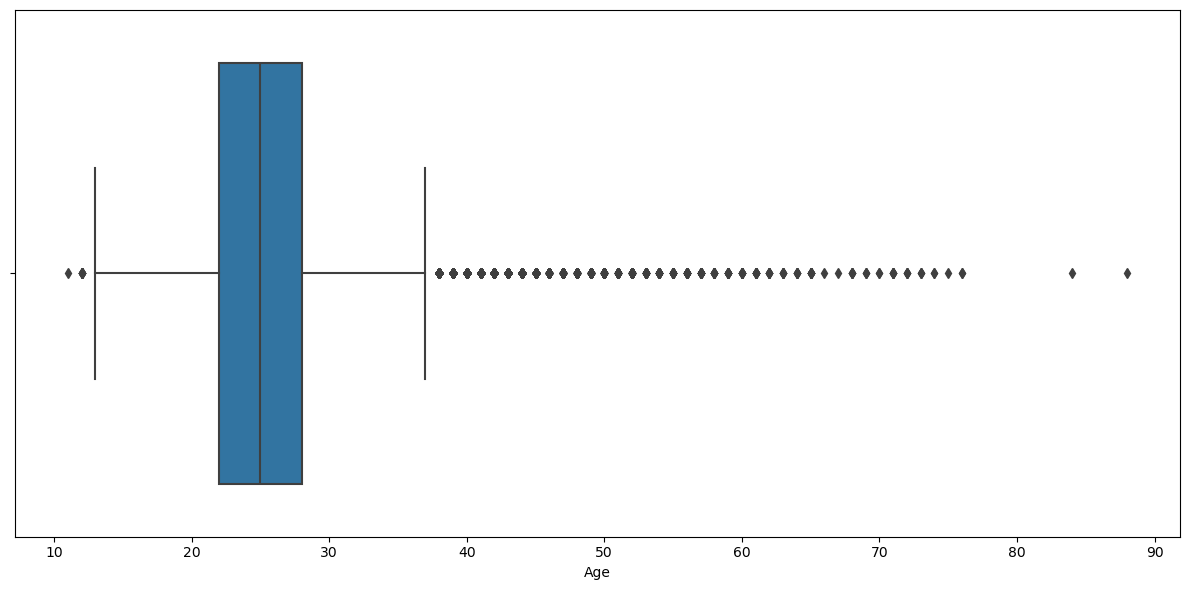

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x = df["Age"])
plt.tight_layout()

In [20]:
# FILLING MISSING VALUES IN COLUMN HEIGHT WITH THE MEDIAN
df["Height"] = df["Height"].fillna(df["Height"].median())
missing_height = df['Height'].isna().sum()
missing_height

0

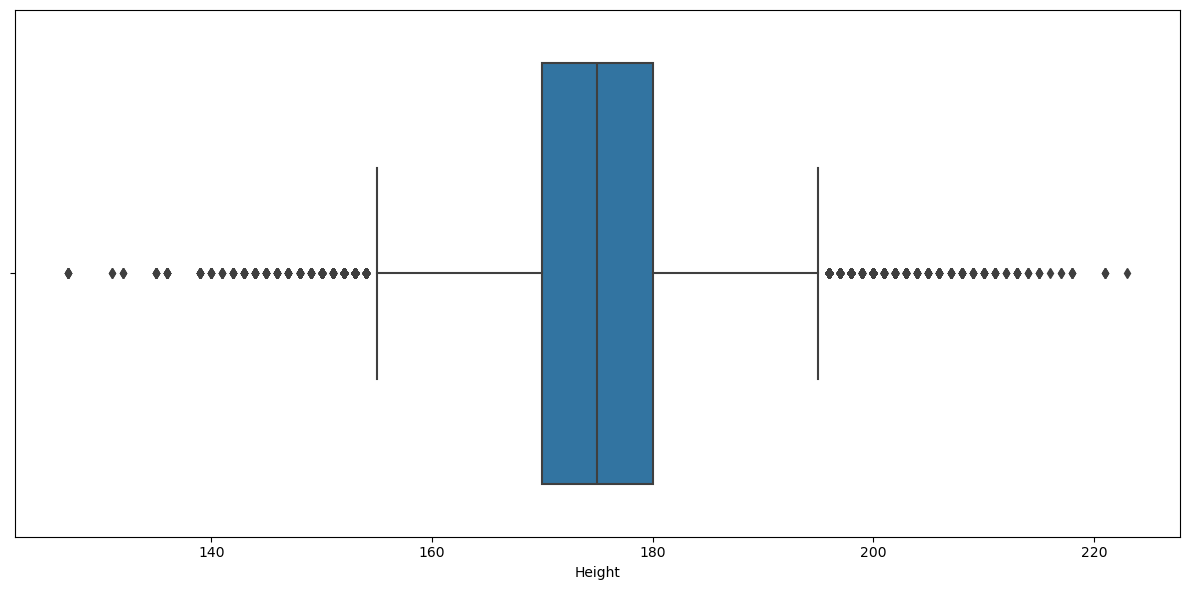

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x = df["Height"])
plt.tight_layout()

In [22]:
#FILLING MISSING DATA WITH MODE

#df['Weight'] = df['Weight'].fillna(df['Weight'].mode().iloc[0])
df["Weight"] = df["Weight"].fillna(df["Weight"].mode()[0])
missing_weight = df['Weight'].isna().sum()
missing_weight

0

In [23]:
# All Nan values become 0
#df ['Medal'] = df['Medal'].fillna('Nan')
#df.isnull().sum()

In [25]:
# Print the unique values
#print("Unique values in column '{}':".format('medal'))
#for value in unique_values:
#    print(value)

In [26]:
df["Medal"] = df["Medal"].fillna("No Medal")
df["Medal"]

0        No Medal
1        No Medal
2        No Medal
3            Gold
4        No Medal
           ...   
69995    No Medal
69996    No Medal
69997    No Medal
69998    No Medal
69999    No Medal
Name: Medal, Length: 69617, dtype: object

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,69617.0,18073.006378,10240.599374,1.0,9303.0,18029.0,26965.0,35658.0
Age,69617.0,25.544260,6.132123,11.0,22.0,25.0,28.0,88.0
Height,69617.0,175.389632,9.126327,127.0,170.0,175.0,180.0,223.0
Weight,69617.0,70.684036,12.399294,25.0,64.0,70.0,75.0,214.0
Year,69617.0,1978.021862,29.982224,1896.0,1960.0,1984.0,2002.0,2016.0


In [28]:
# SEE THE MIN AGE ROW
df[df["Age"] == df["Age"].min()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
43468,22411,Magdalena Cecilia Colledge,F,11.0,152.0,70.0,Great Britain,GBR,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,No Medal


In [29]:
df[df["Age"] == df["Age"].max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
60861,31173,Thomas Cowperthwait Eakins,M,88.0,175.0,70.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal


In [30]:
# Avg. age of participants
avg_age_by_year = df.groupby("Year")["Age"].mean()
print(avg_age_by_year)

Year
1896    24.228801
1900    27.507122
1904    26.791994
1906    26.499912
1908    26.655978
1912    27.875787
1920    28.540003
1924    27.684203
1928    27.490897
1932    29.202312
1936    27.209096
1948    27.937468
1952    26.253091
1956    26.229753
1960    25.149273
1964    24.858007
1968    24.332821
1972    24.143603
1976    23.666408
1980    23.390840
1984    24.100562
1988    24.271329
1992    24.641083
1994    24.487516
1996    25.338269
1998    25.143860
2000    25.435177
2002    26.029095
2004    25.780111
2006    26.091716
2008    25.685067
2010    26.150776
2012    25.993485
2014    26.082814
2016    26.259592
Name: Age, dtype: float64


In [31]:
# Avg. Height of Athletes
sport_median_height = df.groupby("Sport")["Height"].median()
# Max. height among the Athletes
print(sport_median_height.max())

188.0


In [32]:
# Max. height of Athlete belongs to which sport category.
sport_median_height[sport_median_height == 190.0]

Series([], Name: Height, dtype: float64)

In [33]:
# Number of male and female Athletes by country.
country_gender_count = df.groupby(["NOC", "Sex"])["ID"].count()
print(country_gender_count)

NOC  Sex
AFG  M       38
AHO  F        6
     M       27
ALB  F        4
     M        7
           ... 
YUG  M      455
ZAM  F        3
     M       40
ZIM  F       41
     M       47
Name: ID, Length: 432, dtype: int64


In [34]:
# Country with most gold medals.
country_gold_medals = df[df["Medal"] == "Gold"].groupby("NOC")["Medal"].count()
print(country_gold_medals.max())

747


In [35]:
# Avg. weight of male and female Athletes.
sport_gender_avg_weight = df.groupby(["Sport","Sex"])["Weight"].mean()
sport_gender_avg_weight["Swimming"]["M"]

75.40396689497717

In [36]:
country_gold_medals[country_gold_medals == 747]

NOC
USA    747
Name: Medal, dtype: int64

In [38]:
# Most medal winning Country
most_medals_by_country = df["NOC"].value_counts().idxmax()
print("Most medal winning country is:", most_medals_by_country)

Most medal winning country is: USA


In [39]:
# Tallest Athlete
tallest_athlete = df[df["Height"] == df["Height"].max()]
print("Tallest Athlete:")
print(tallest_athlete[["ID","Name","Height","Sport","NOC"]])

Tallest Athlete:
          ID                  Name  Height       Sport  NOC
32376  16639  Tommy Loren Burleson   223.0  Basketball  USA


In [41]:
# Heaviest Athlete
heaviest_athlete = df[df["Weight"] == df["Weight"].max()]
print("Heaviest Athlete:")
print(heaviest_athlete[["ID","Name","Weight","Sport","NOC"]])

Heaviest Athlete:
          ID               Name  Weight Sport  NOC
23155  12177  Ricardo Blas, Jr.   214.0  Judo  GUM
23156  12177  Ricardo Blas, Jr.   214.0  Judo  GUM


# Analyzing the DATA

<Axes: title={'center': 'Male vs Female paticipats'}, xlabel='Sex', ylabel='count'>

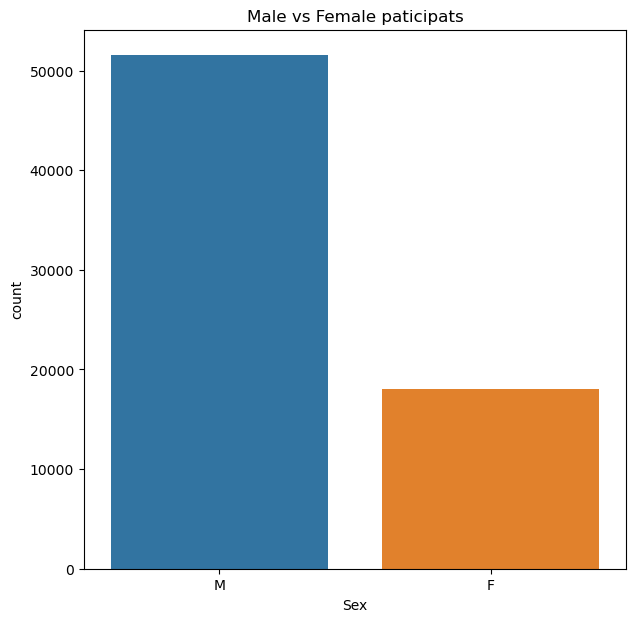

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = [7,7])
plt.title('Male vs Female paticipats')
sns.countplot(data=df, x='Sex')


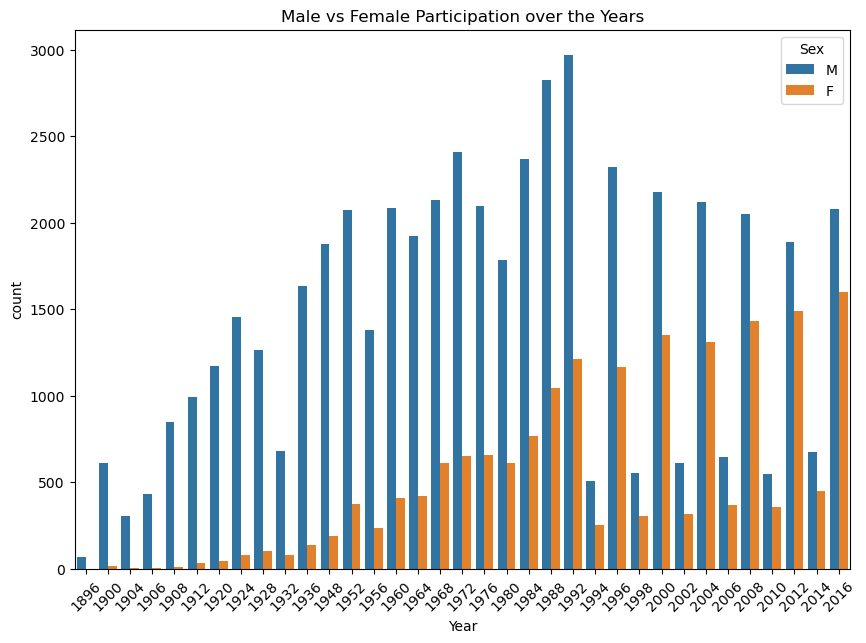

In [43]:
plt.figure(figsize = [10,7])
ax = sns.countplot(data=df, x='Year',hue='Sex');
plt.xticks(rotation = 45)
plt.title('Male vs Female Participation over the Years')
plt.show()

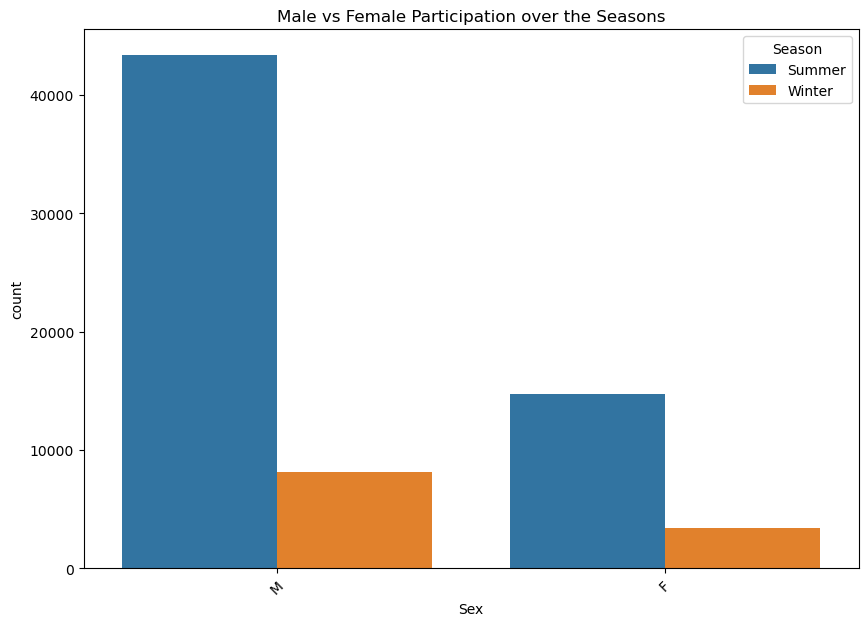

In [44]:
plt.figure(figsize = [10,7])
ax = sns.countplot(data=df, x='Sex',hue='Season');
plt.xticks(rotation = 45)
plt.title('Male vs Female Participation over the Seasons')
plt.show()

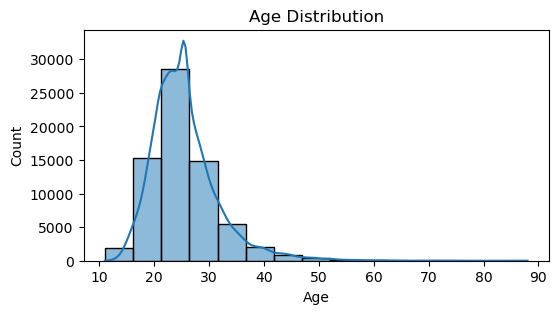

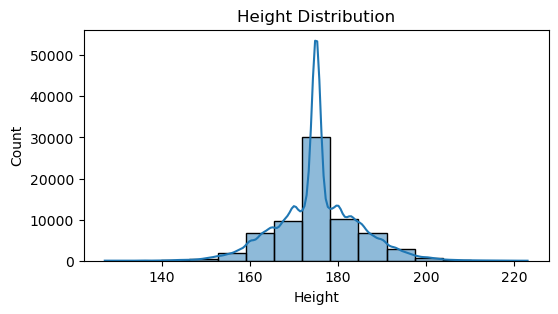

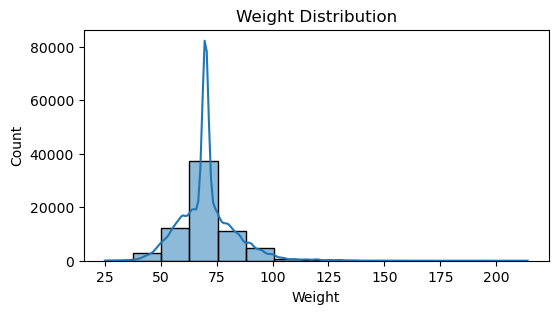

In [45]:
columns = ['Age', 'Height', 'Weight']
for i in columns:
    plt.figure(figsize = [6,3])
    sns.histplot(df[i], bins=15, kde=True)
    plt.title(i+' Distribution')
    plt.show()

In [46]:
data = df.groupby('NOC')[['Medal']].value_counts().reset_index().groupby(['NOC']).sum().reset_index()

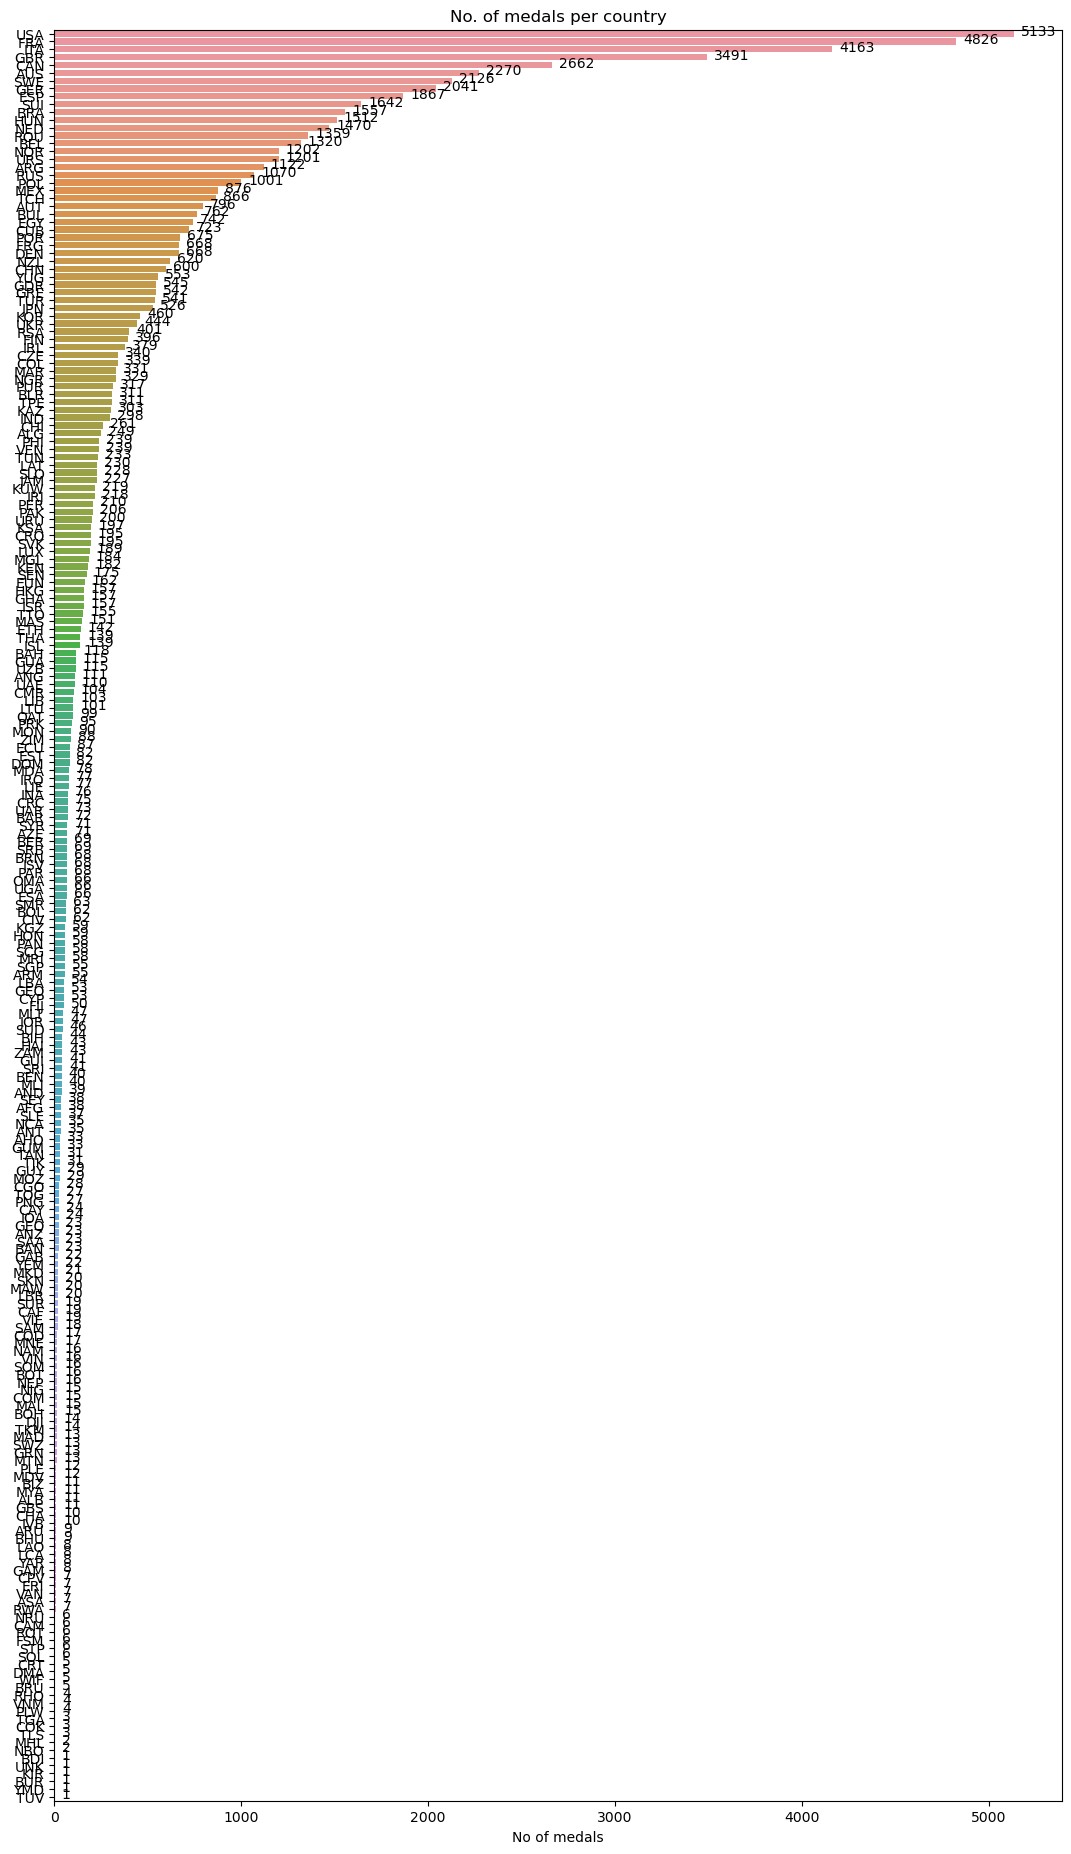

In [47]:
d = data.sort_values(by = 'count', ascending = False)
plt.figure(figsize = [13,23])
sns.barplot(data = d, y='NOC', x = 'count', orient='h')
for index, value in enumerate(d['count']):
    plt.annotate(str(value), (value, index + 0.25), textcoords="offset points", xytext=(5, 0), ha='left', fontsize=10)

plt.title('No. of medals per country')
plt.xlabel('No of medals')
plt.ylabel('')
plt.show()

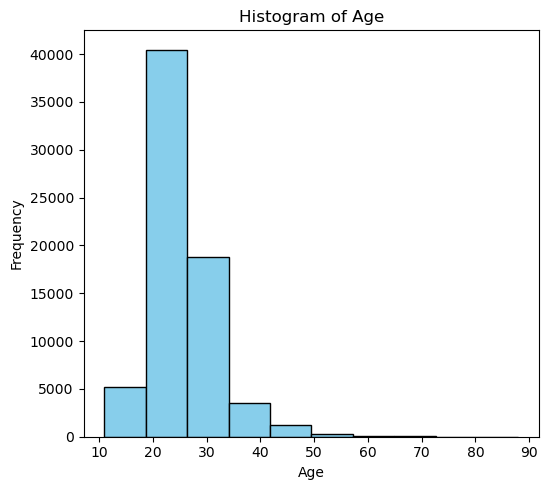

In [48]:

# Create the subplots grid
plt.figure(figsize=(15, 5))

# Histogram for Age (1 row, 3 columns, 1st subplot)
plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=10, edgecolor='black', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

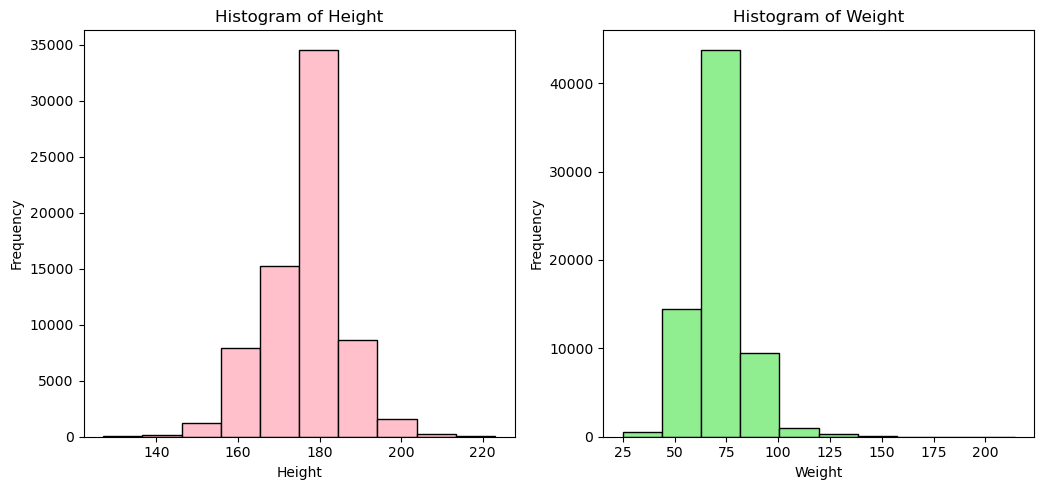

In [49]:

# Create the subplots grid
plt.figure(figsize=(15, 5))

# Histogram for Height (1 row, 3 columns, 2nd subplot)
plt.subplot(1, 3, 2)
plt.hist(df['Height'], bins=10, edgecolor='black', color='pink')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of Height')

# Histogram for Weight (1 row, 3 columns, 3rd subplot)
plt.subplot(1, 3, 3)
plt.hist(df['Weight'], bins=10, edgecolor='black', color='lightgreen')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Weight')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [50]:
#Grouping the sports by sex of the partisipents

sports = df['Sport'].unique()
sports
sport_sex_counts = df.groupby(['Sport', 'Sex']).size().reset_index(name='Count')
sport_sex_counts

,Sport,Sex,Count
0,Alpine Skiing,F,815
1,Alpine Skiing,M,1511
2,Alpinism,F,1
3,Alpinism,M,6
4,Archery,F,244
...,...,...,...
109,Water Polo,M,911
110,Weightlifting,F,95
111,Weightlifting,M,924
112,Wrestling,F,71


In [51]:
from tabulate import tabulate

pivot_table = sport_sex_counts.pivot_table(index='Sport', columns='Sex', values='Count', fill_value=0)
print(tabulate(pivot_table, headers='keys', tablefmt='grid', showindex=True))


pivot_table.rename(columns={'M': 'Male_Count', 'F': 'Female_Count'}, inplace=True)


+---------------------------+------+------+
| Sport                     |    F |    M |
+===========================+======+======+
| Alpine Skiing             |  815 | 1511 |
+---------------------------+------+------+
| Alpinism                  |    1 |    6 |
+---------------------------+------+------+
| Archery                   |  244 |  334 |
+---------------------------+------+------+
| Art Competitions          |   71 |  522 |
+---------------------------+------+------+
| Athletics                 | 3103 | 7526 |
+---------------------------+------+------+
| Badminton                 |  131 |  170 |
+---------------------------+------+------+
| Baseball                  |    0 |  228 |
+---------------------------+------+------+
| Basketball                |  330 |  921 |
+---------------------------+------+------+
| Basque Pelota             |    0 |    1 |
+---------------------------+------+------+
| Beach Volleyball          |   59 |   81 |
+---------------------------+---

# Medals Analysis

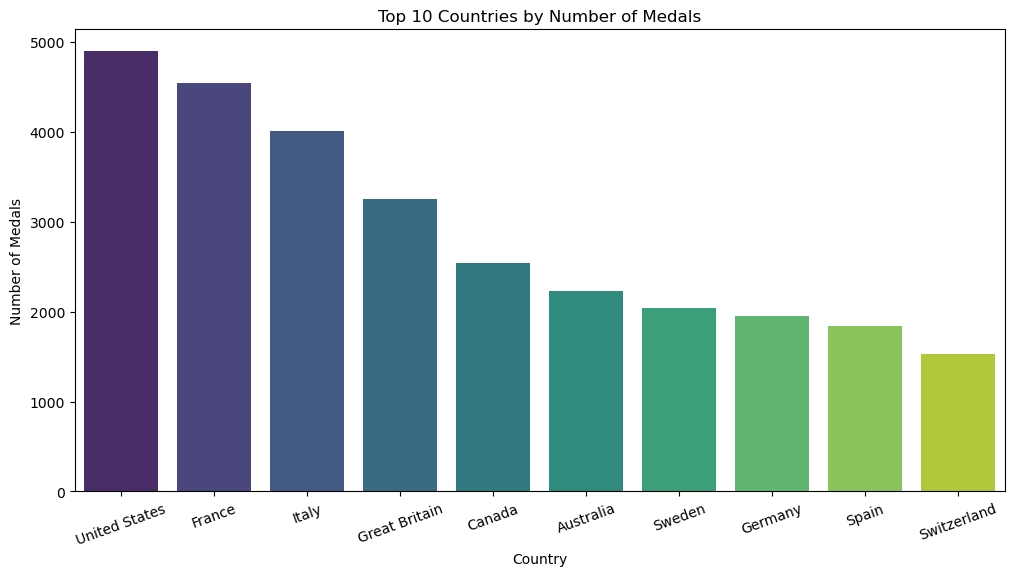

In [52]:
# Dropping rows with no medals
medals_data = df.dropna(subset=['Medal'])

# Counting the number of medals for each country
country_medals = medals_data['Team'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_medals.index, y=country_medals.values, palette='viridis')
plt.title('Top 10 Countries by Number of Medals')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=20)
plt.show()


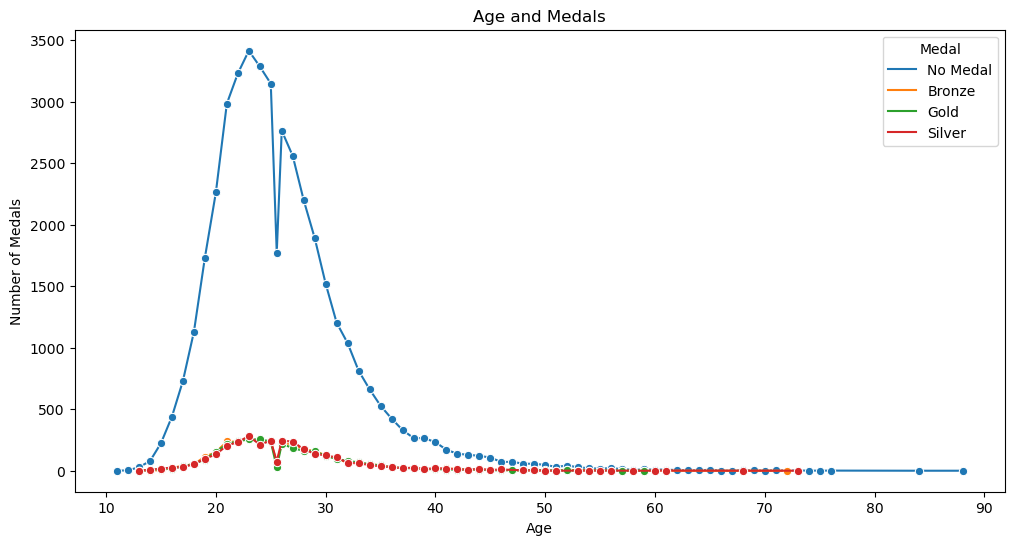

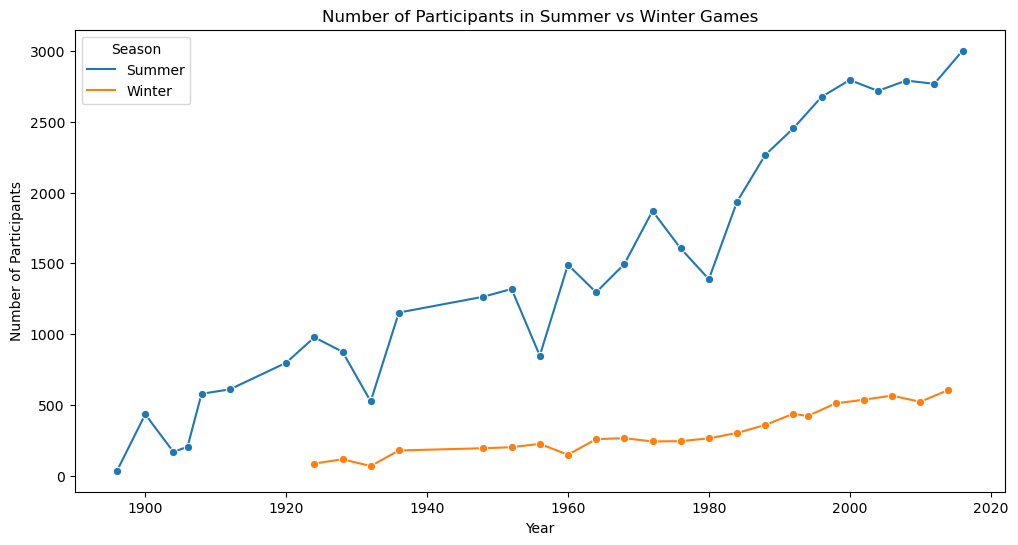

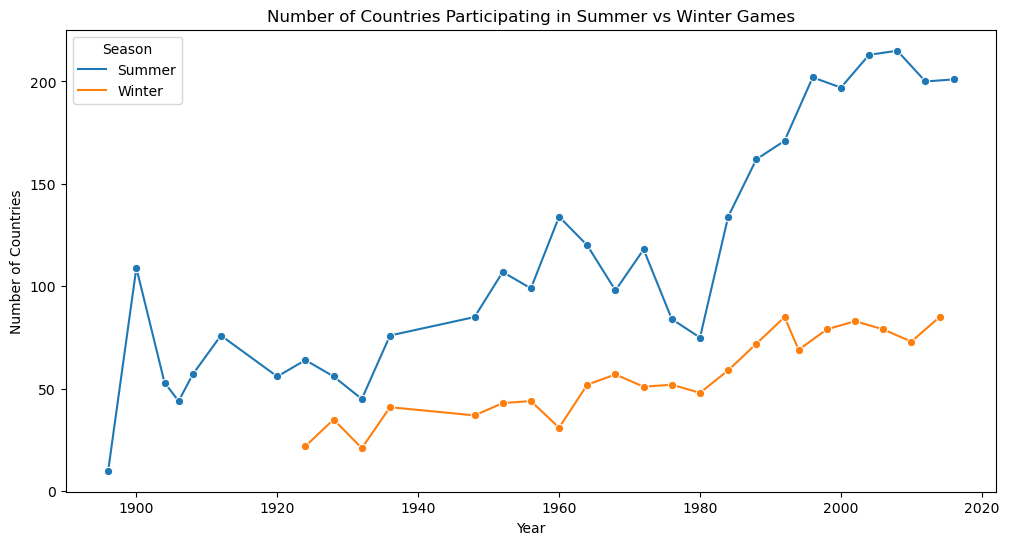

In [53]:
# Calculating the number of unique participants and countries for each year and season
medal_trends = df.groupby(['Age', 'Medal']).agg({'ID': 'nunique', 'Team': 'nunique'}).reset_index()
medal_trends.columns = ['Age', 'Medal', 'Number of Medals', 'Number of Countries']

season_trends = df.groupby(['Year', 'Season']).agg({'ID': 'nunique', 'Team': 'nunique'}).reset_index()
season_trends.columns = ['Year', 'Season', 'Number of Participants', 'Number of Countries']


plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Number of Medals', hue='Medal', data=medal_trends, marker='o')
plt.title('Age and Medals')
plt.xlabel('Age')
plt.ylabel('Number of Medals')
plt.legend(title='Medal')
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number of Participants', hue='Season', data=season_trends, marker='o')
plt.title('Number of Participants in Summer vs Winter Games')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.legend(title='Season')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number of Countries', hue='Season', data=season_trends, marker='o')
plt.title('Number of Countries Participating in Summer vs Winter Games')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend(title='Season')
plt.show()


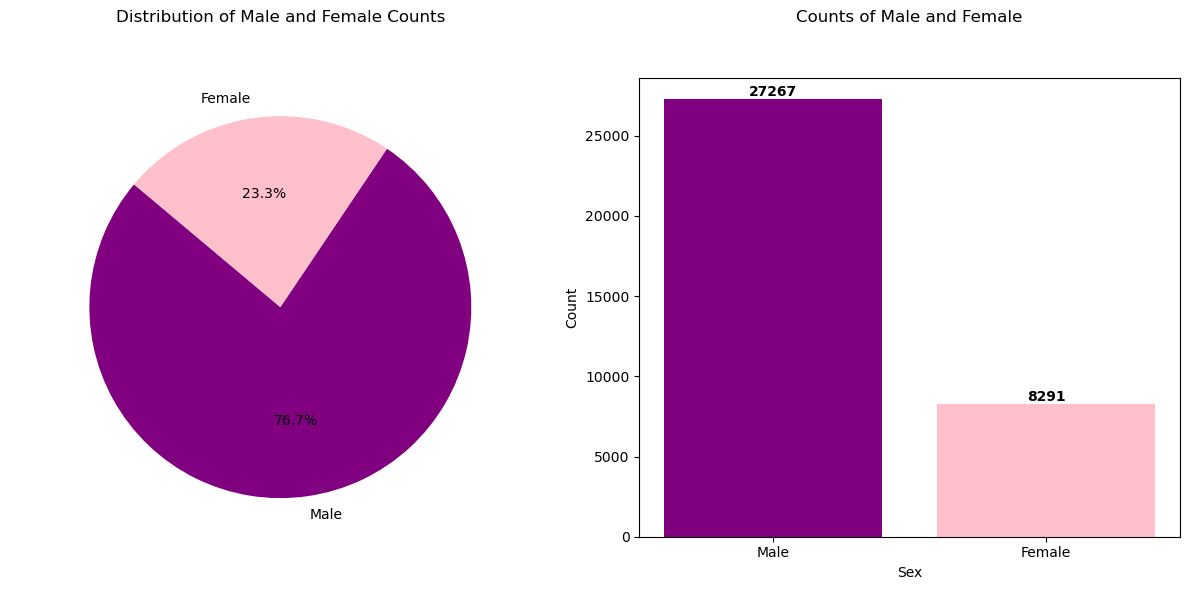

In [54]:
name_sex_counts = df.groupby(['Name', 'Sex']).size().reset_index(name='Count')
sex_mapping = {'M': 'Male', 'F': 'Female'}
name_sex_counts['Sex'] = name_sex_counts['Sex'].map(sex_mapping)
sex_counts = name_sex_counts['Sex'].value_counts()

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create the pie chart in the first subplot (axes[0])
axes[0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['purple', 'pink'], startangle=140)
axes[0].set_title('Distribution of Male and Female Counts', pad=40)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create the bar chart in the second subplot (axes[1])
bars = axes[1].bar(sex_counts.index, sex_counts, color=['purple', 'pink'])
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Count')
axes[1].set_title('Counts of Male and Female', pad=40)


#COUNTER 
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

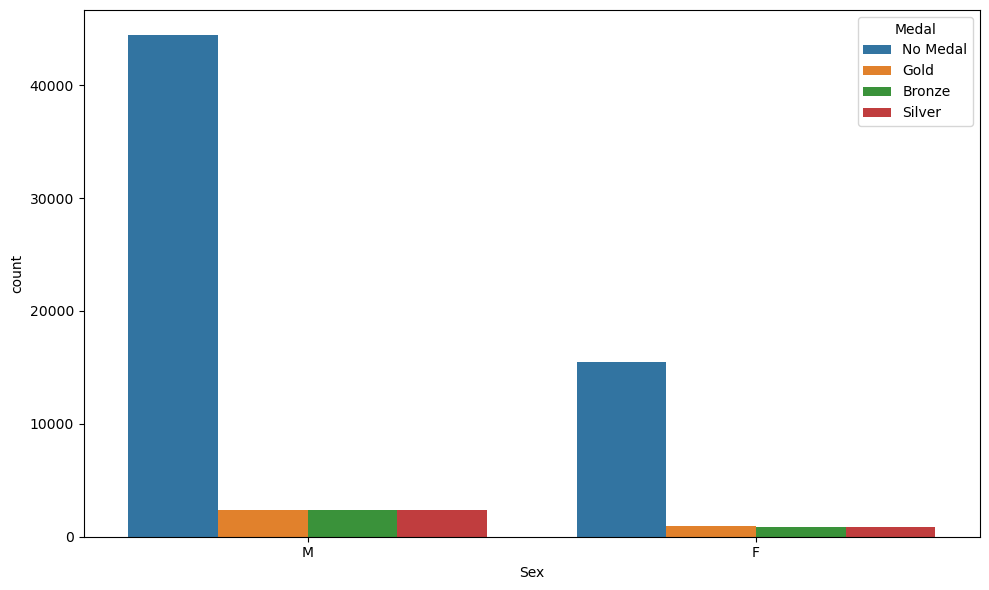

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(x = df["Sex"],hue=df["Medal"])
plt.tight_layout()

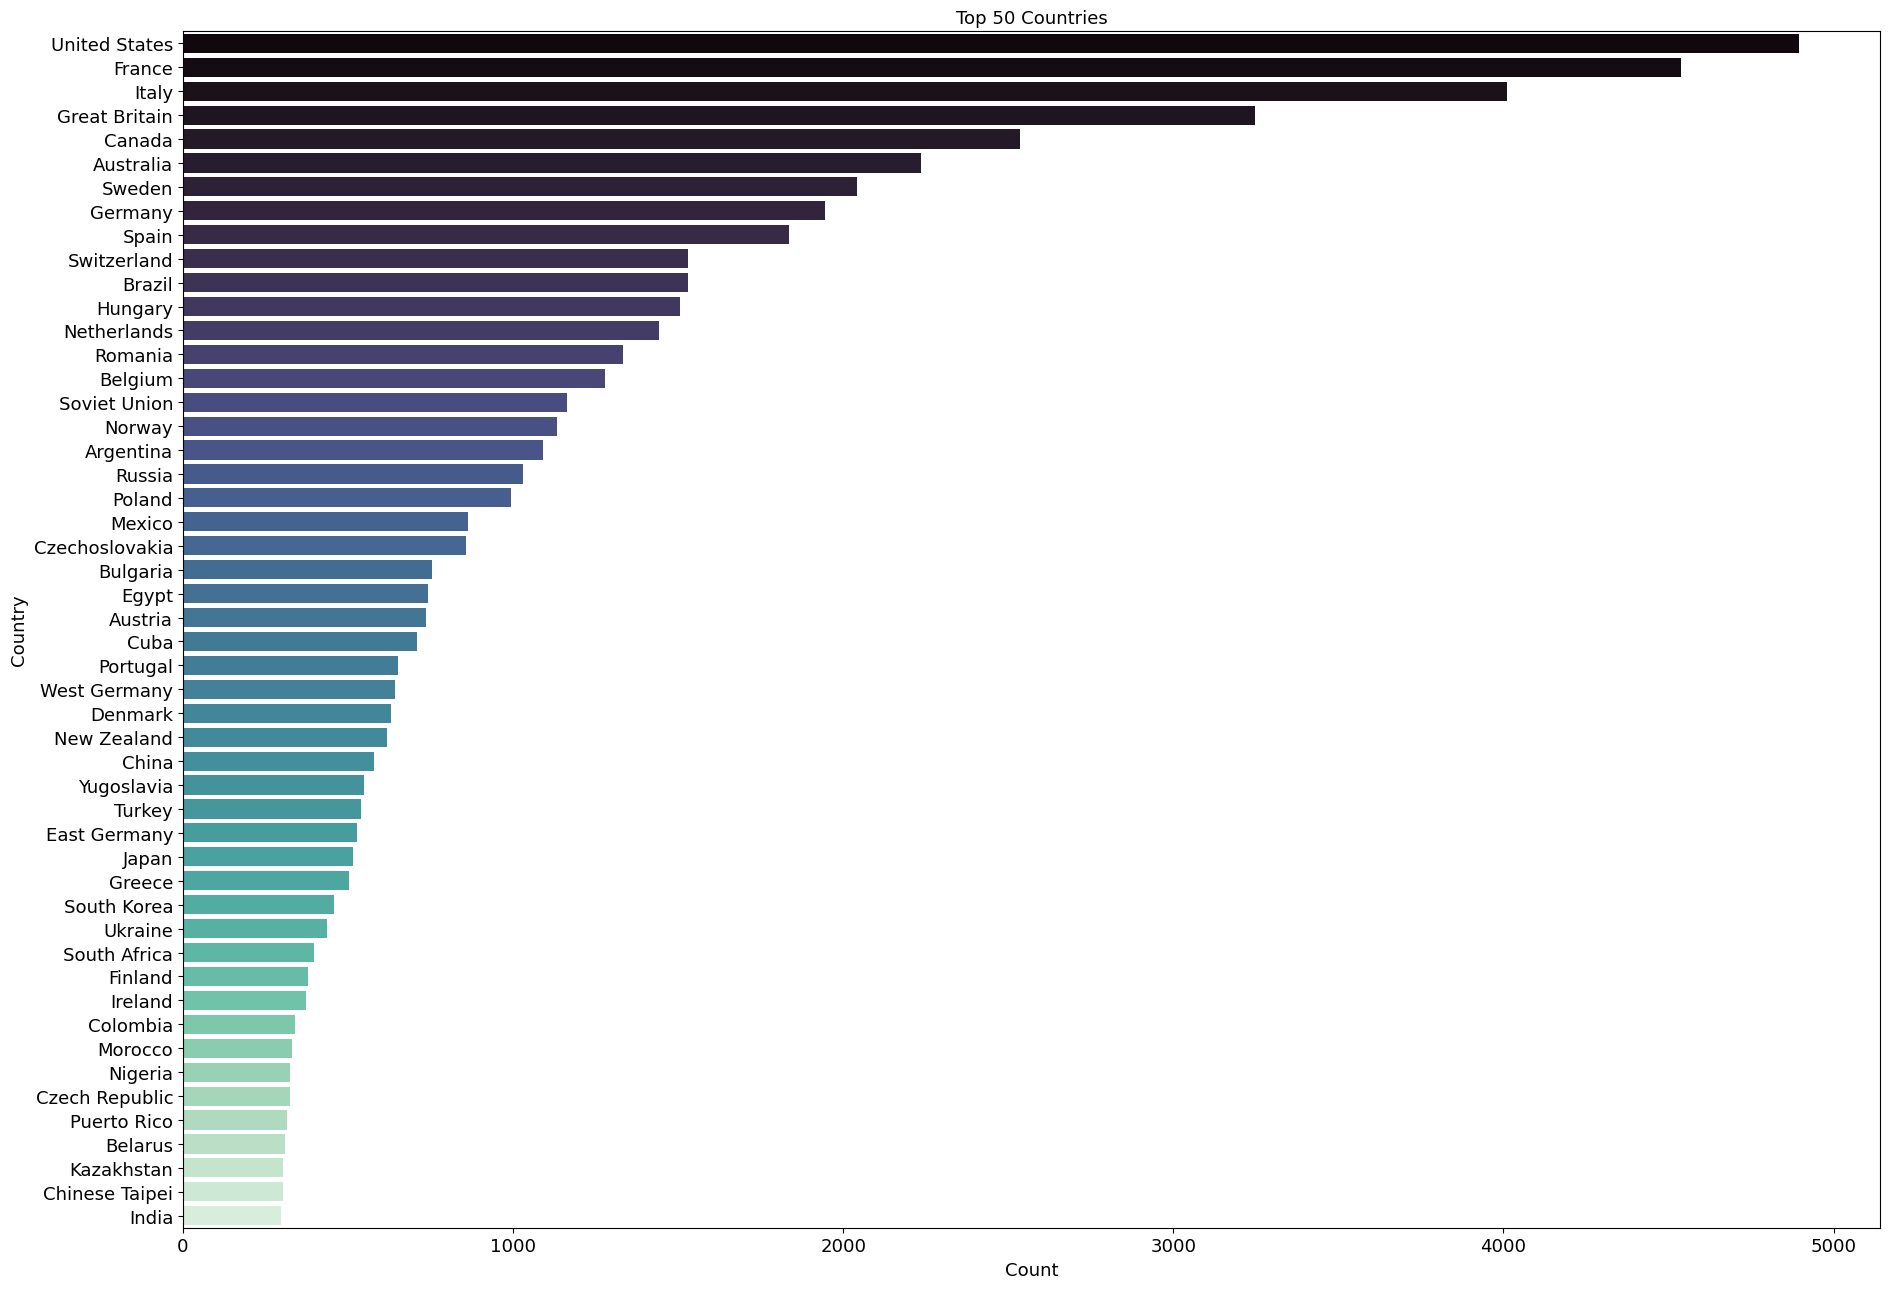

In [56]:
team_df = pd.DataFrame(df["Team"].value_counts()[:50]).reset_index()
plt.figure(figsize=(19,13))
ax1 = sns.barplot(y = team_df["Team"],x=team_df["count"],palette="mako")
ax1.tick_params(axis= "x" ,labelsize=13)
ax1.tick_params(axis= "y" ,labelsize=13)
plt.ylabel("Country",fontsize = 13)
plt.xlabel("Count",fontsize = 13)
plt.title("Top 50 Countries",fontsize = 13)
plt.tight_layout()

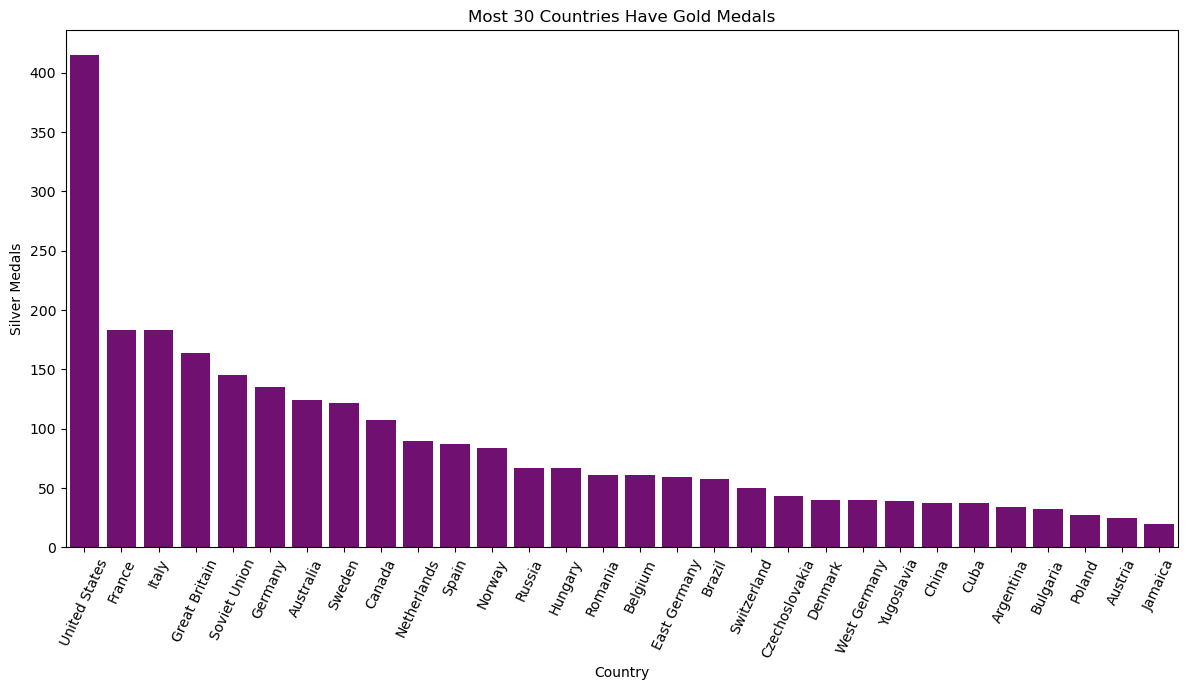

In [57]:
gold_team = pd.DataFrame(df.loc[df["Medal"] == "Silver","Team"].value_counts()[:30]).reset_index()
plt.figure(figsize=(12,7))
ax1 = sns.barplot(x = gold_team["Team"],y=gold_team["count"],color="purple")
ax1.tick_params(axis='x', rotation=65)
ax1.set_ylabel("Silver Medals")
ax1.set_xlabel("Country")
ax1.set_title("Most 30 Countries Have Gold Medals")
plt.tight_layout()

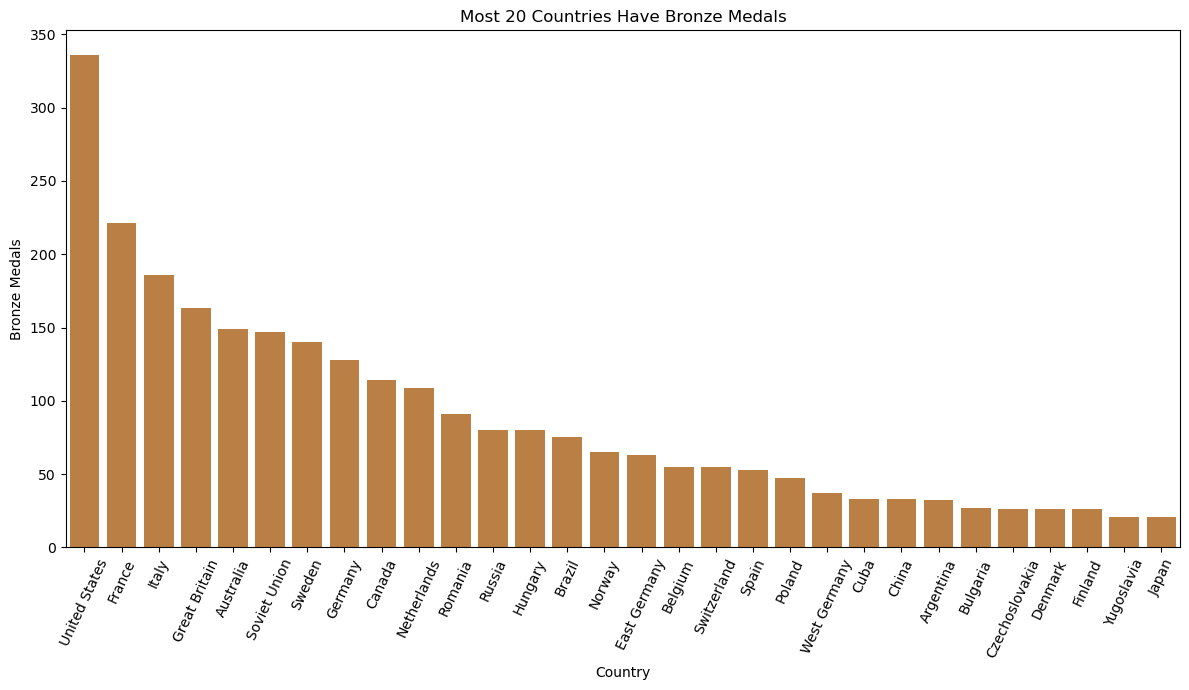

In [58]:
Bronze_team = pd.DataFrame(df.loc[df["Medal"] == "Bronze","Team"].value_counts()[:30]).reset_index()
plt.figure(figsize=(12,7))
ax1 = sns.barplot(x = Bronze_team["Team"],y=Bronze_team["count"],color="#CD7F32")
ax1.tick_params(axis='x', rotation=65)
ax1.set_ylabel("Bronze Medals")
ax1.set_xlabel("Country")
ax1.set_title("Most 20 Countries Have Bronze Medals")
plt.tight_layout()

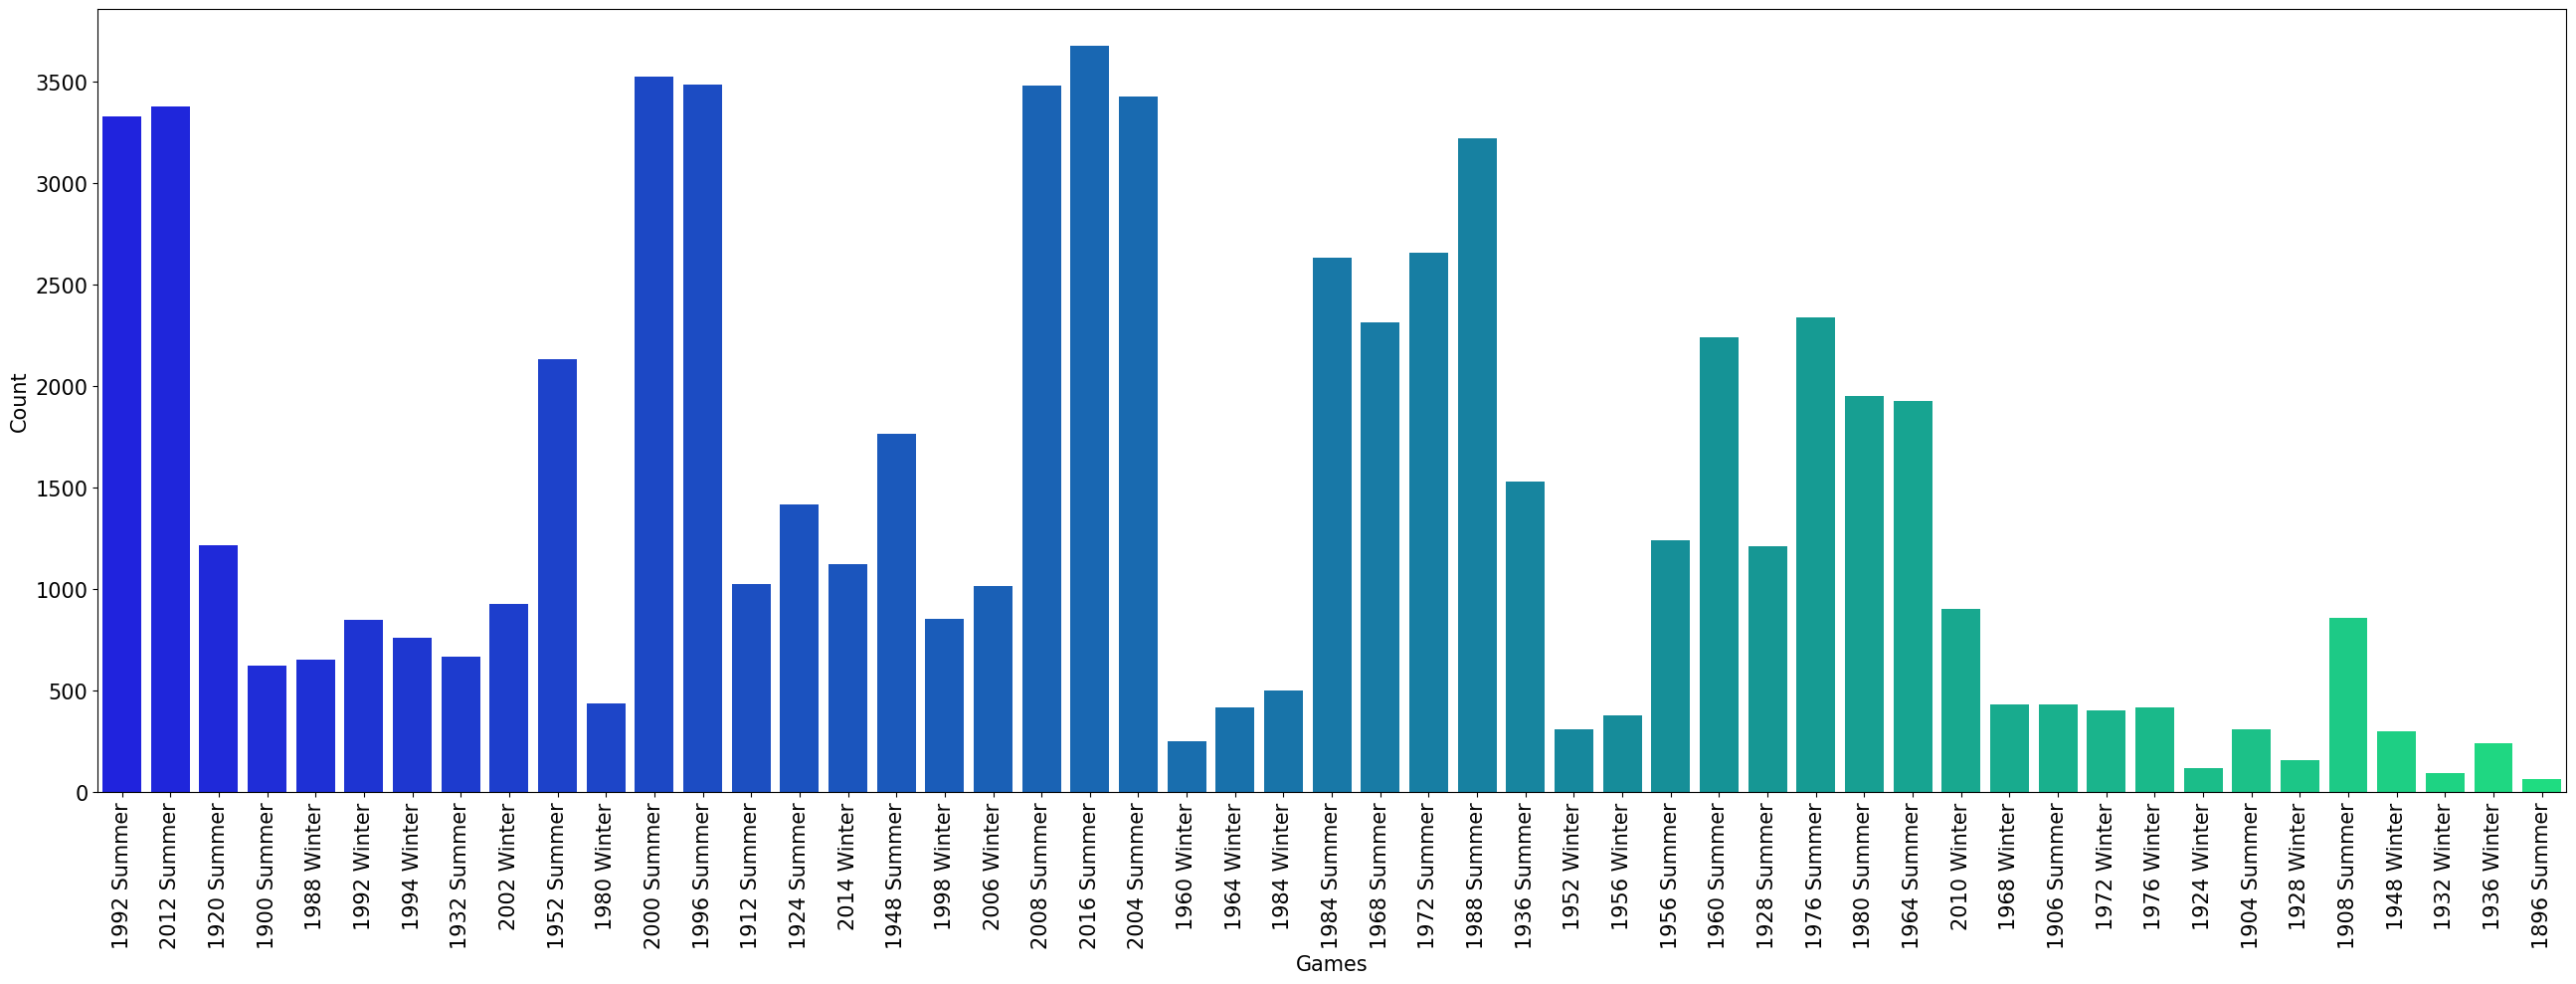

In [172]:
plt.figure(figsize=(26,10))
ax1 = sns.countplot(x = df["Games"],palette="winter")
ax1.tick_params(axis='x', rotation=90)
ax1.tick_params(axis= "x" ,labelsize=15)
ax1.tick_params(axis= "y" ,labelsize=15)
plt.ylabel("Count",fontsize = 15)
plt.xlabel("Games",fontsize = 15)
plt.tight_layout()

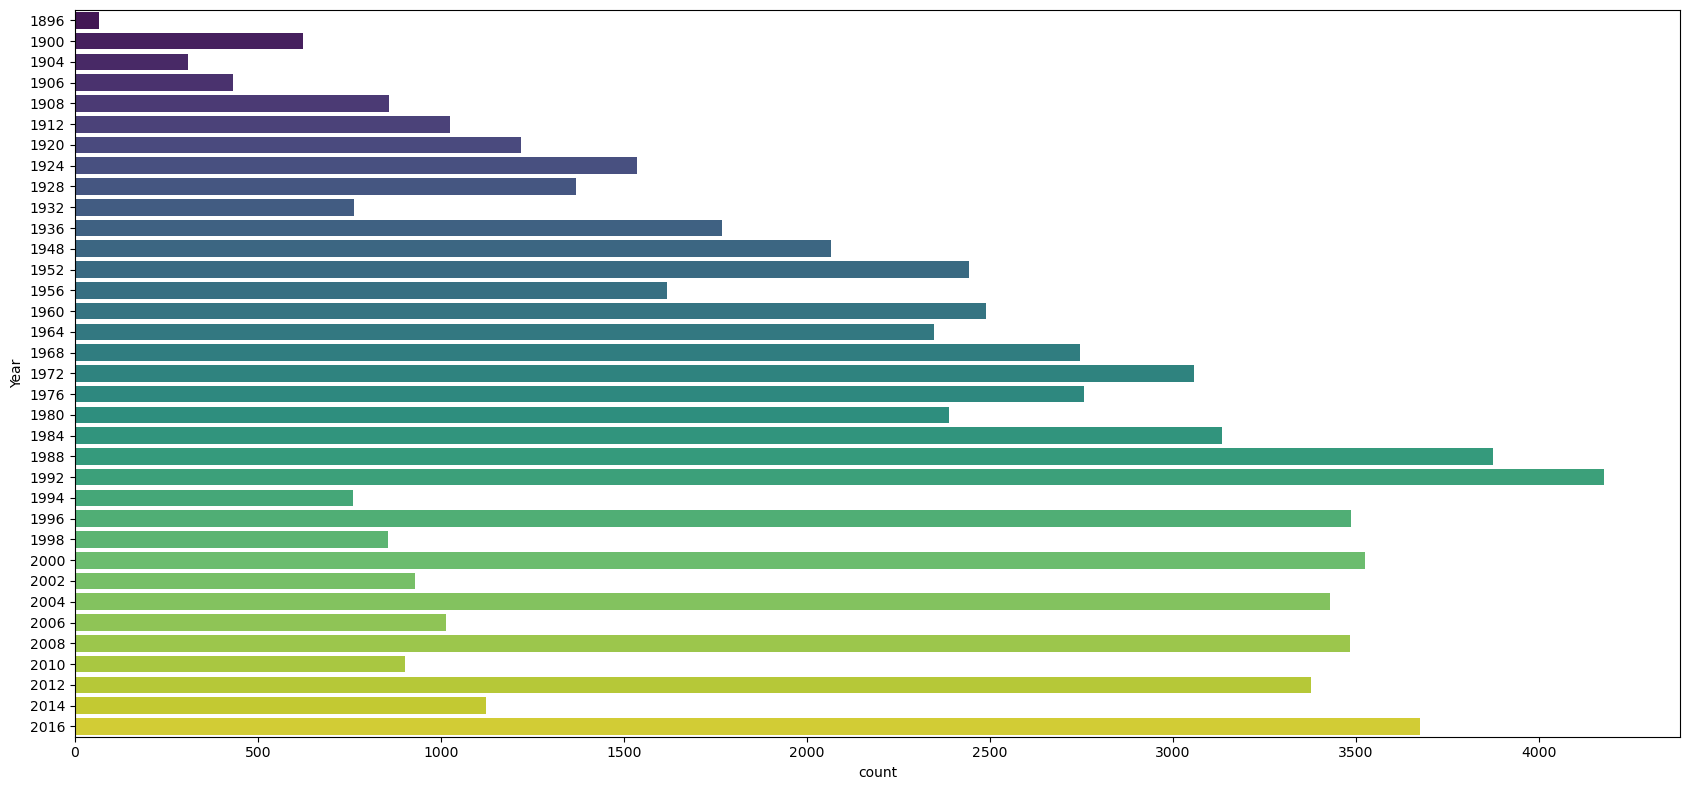

In [59]:
plt.figure(figsize=(17,8))
sns.countplot(y = df["Year"],palette="viridis")
plt.tight_layout()

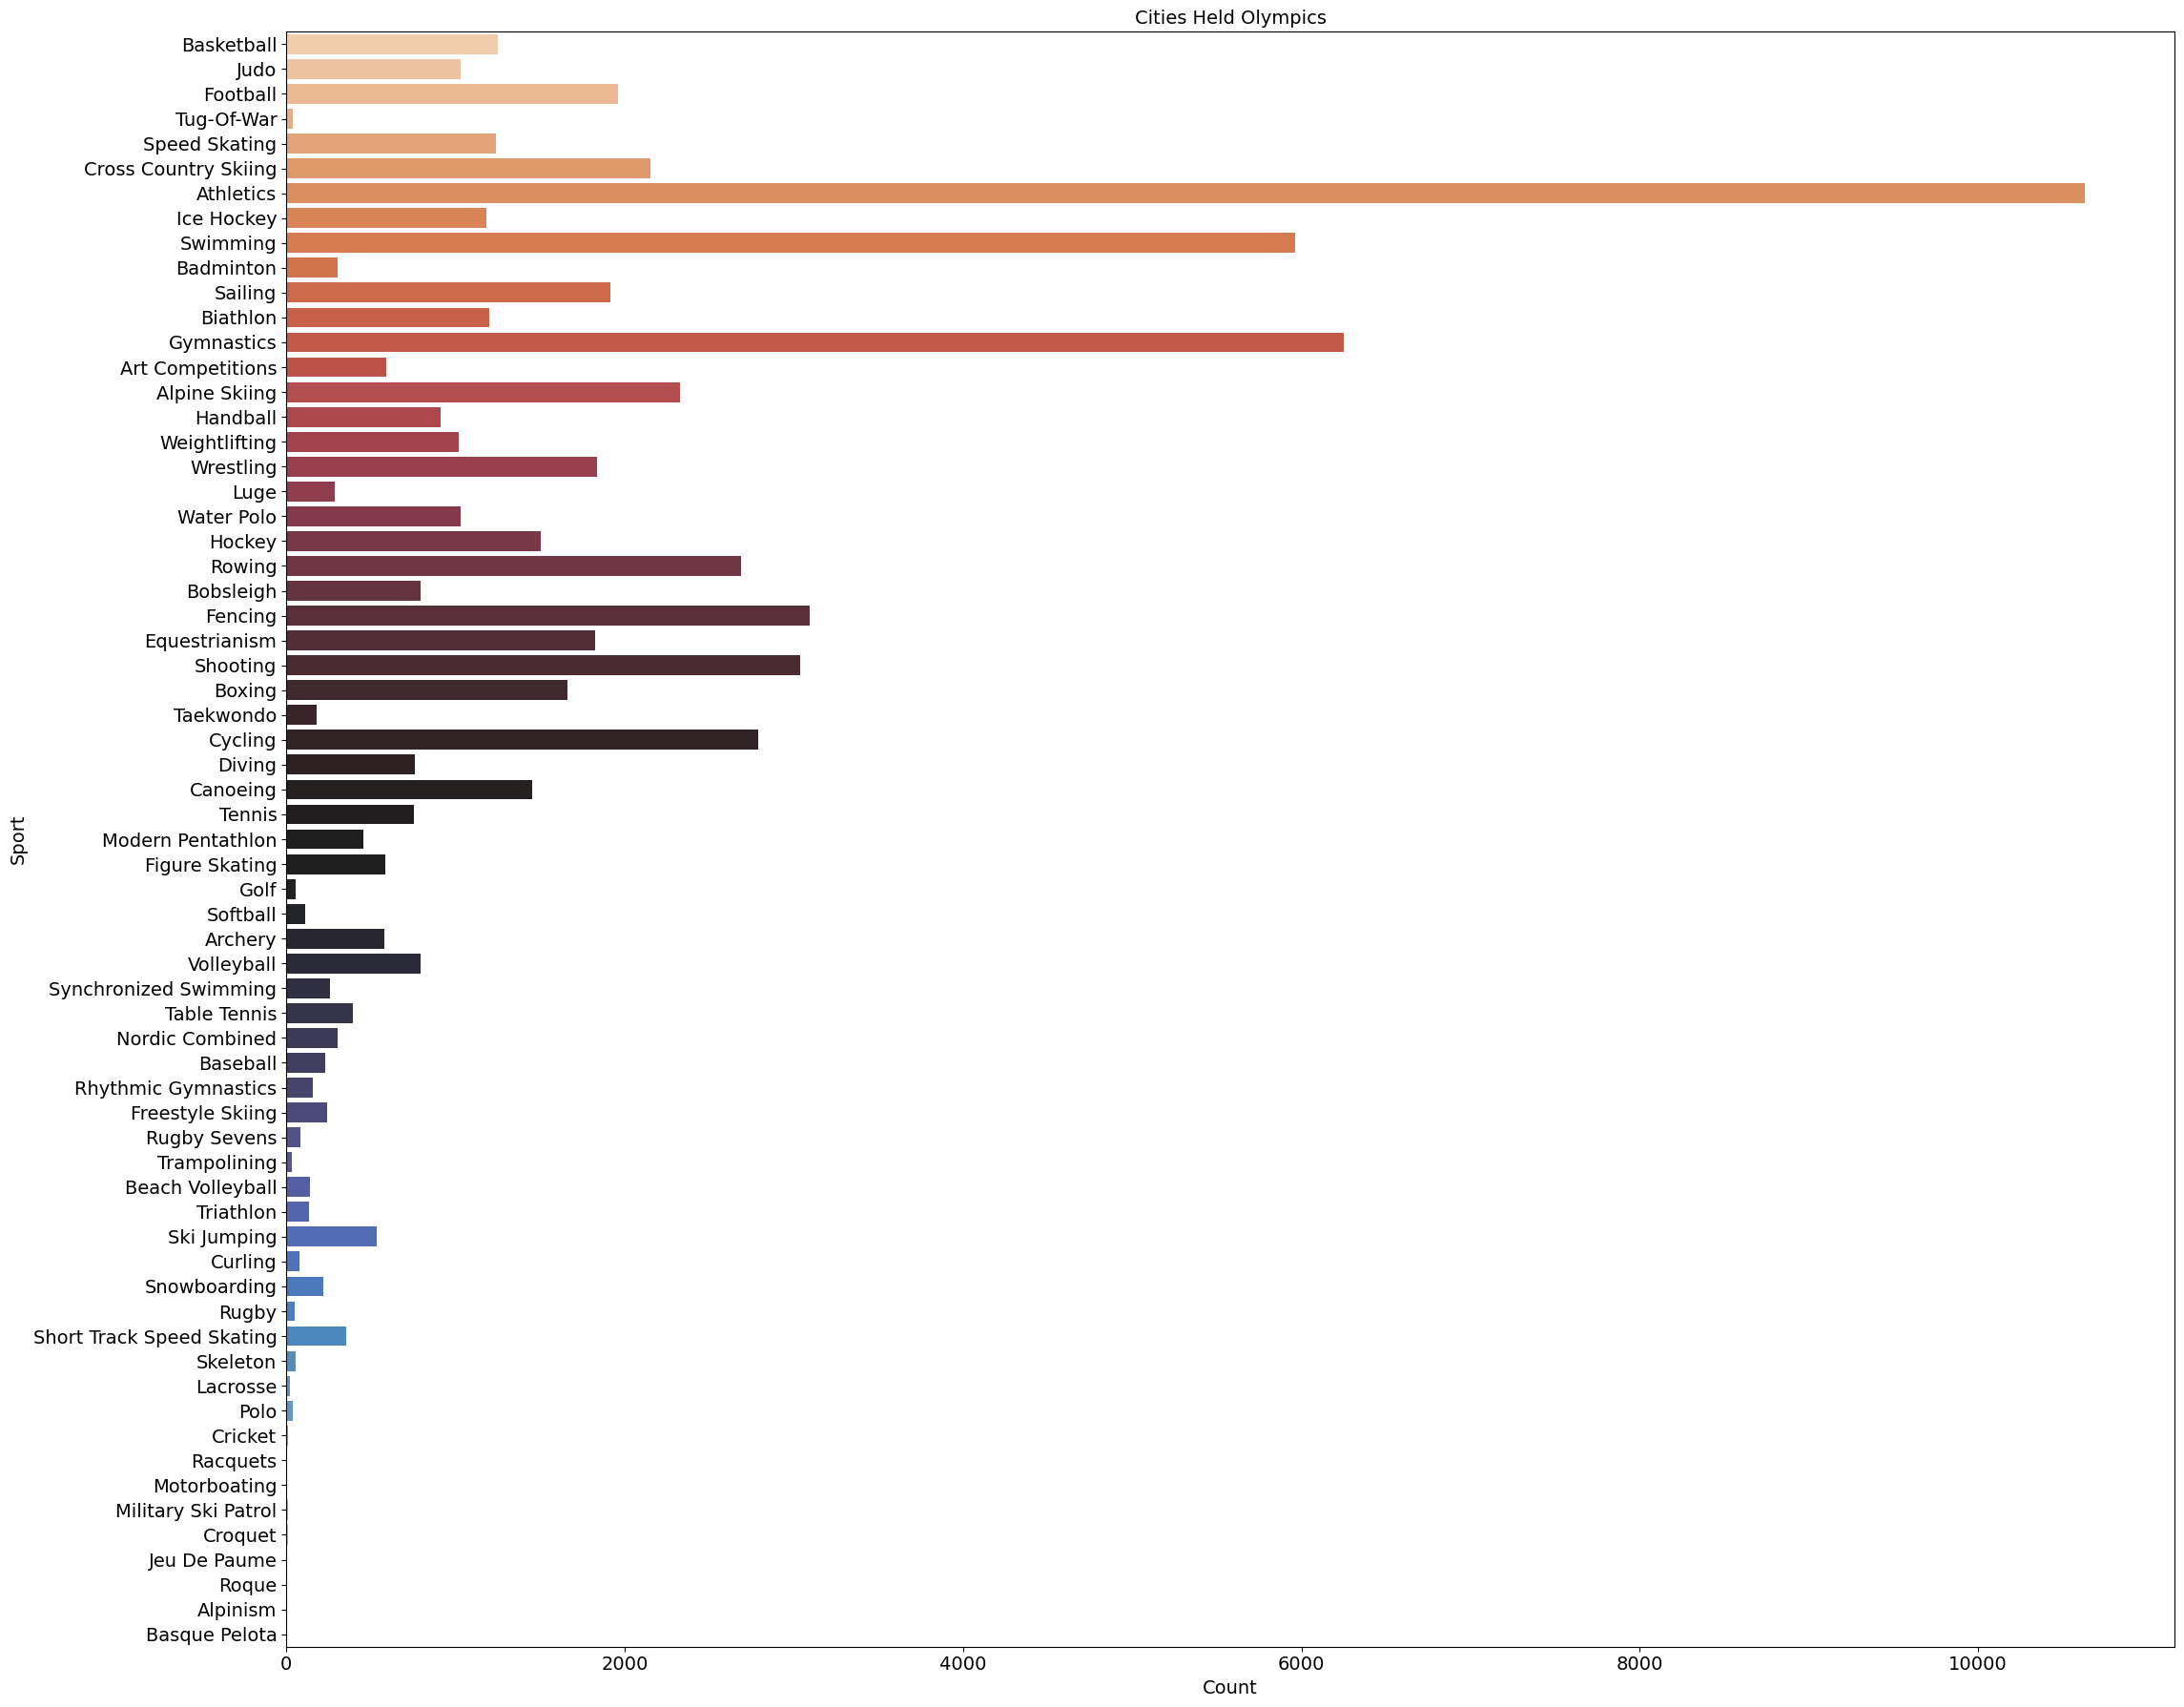

In [60]:
plt.figure(figsize=(23,18))
ax1 = sns.countplot(y = df["Sport"],palette="icefire_r")
ax1.tick_params(axis= "x" ,labelsize=14)
ax1.tick_params(axis= "y" ,labelsize=14)
plt.ylabel("Sport",fontsize = 14)
plt.xlabel("Count",fontsize = 14)
plt.title("Cities Held Olympics",fontsize = 14)
plt.tight_layout()

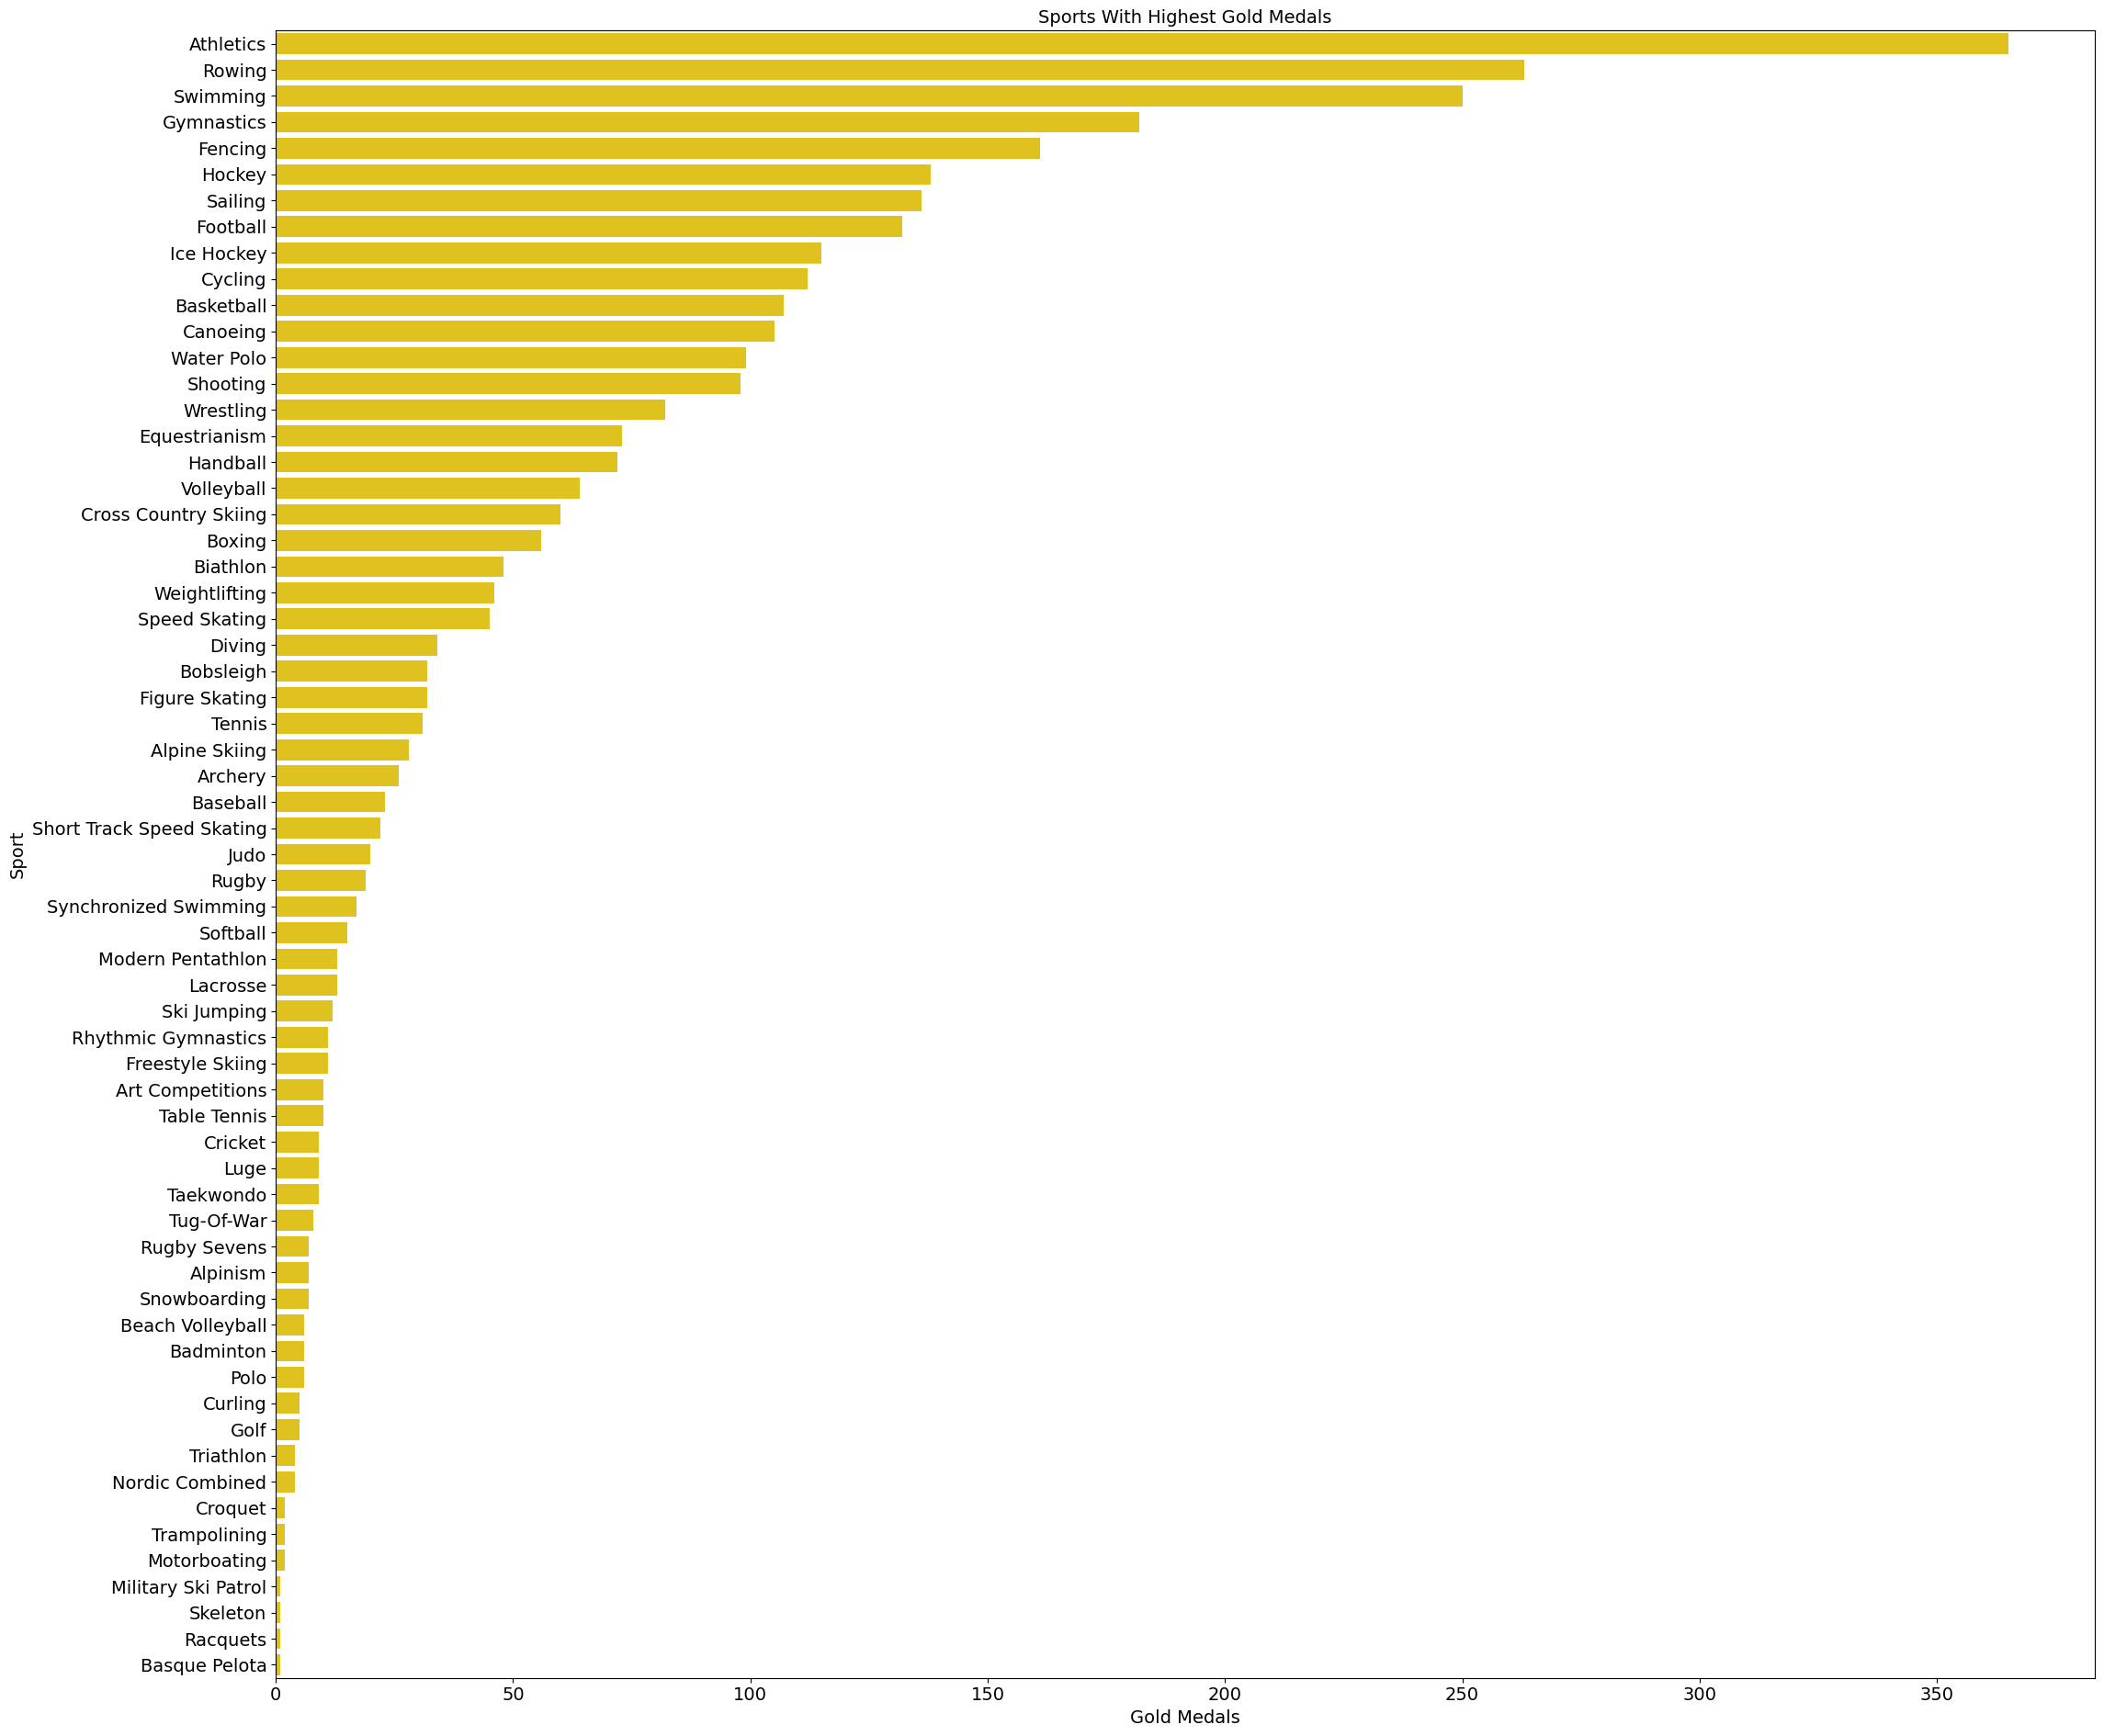

In [61]:
gold_Sport = pd.DataFrame(df.loc[df["Medal"] == "Gold","Sport"].value_counts()).reset_index()
plt.figure(figsize=(23,19))
ax1 = sns.barplot(y = gold_Sport["Sport"],x=gold_Sport["count"],color="#FFD700")
ax1.tick_params(axis= "x" ,labelsize=14)
ax1.tick_params(axis= "y" ,labelsize=14)
plt.ylabel("Sport",fontsize = 14)
plt.xlabel("Gold Medals",fontsize = 14)
ax1.set_title("Sports With Highest Gold Medals",fontsize=14)
plt.tight_layout()

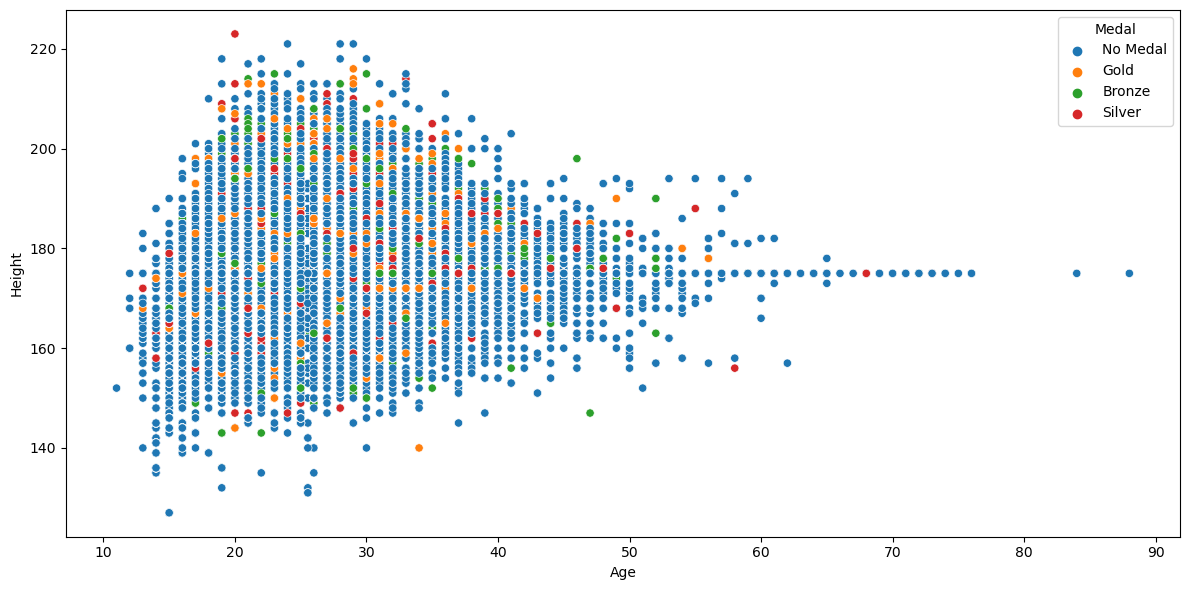

In [62]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = df["Age"],y=df["Height"],hue=df["Medal"])
plt.tight_layout()

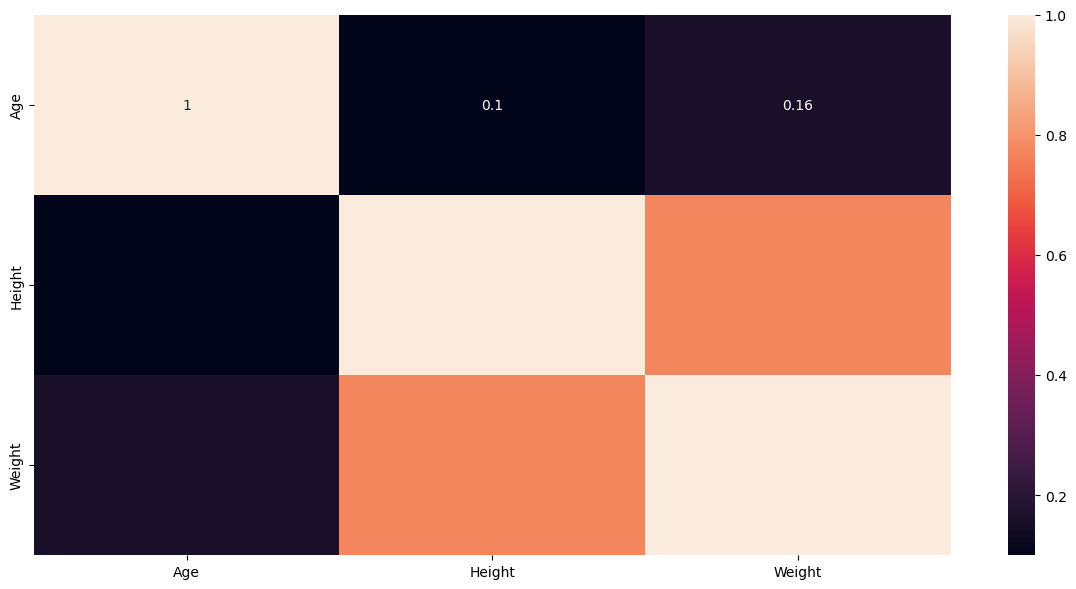

In [63]:
plt.figure(figsize=(12,6))
sns.heatmap(df[["Age","Height","Weight"]].corr(),annot=True)
plt.tight_layout()

# Creating tables with information

In [64]:
q_25 = np.quantile(df["Age"],q=0.25)
q_50 = np.quantile(df["Age"],q=0.50)
q_75 = np.quantile(df["Age"],q=0.75)
mini = df["Age"].min()
maxi = df["Age"].max()
first = df.loc[(df["Age"] >= mini) & (df["Age"] < q_25),"Medal"].value_counts().to_dict()# create dictionary
second = df.loc[(df["Age"] >= q_25) & (df["Age"] < q_50),"Medal"].value_counts().to_dict()
third = df.loc[(df["Age"] >= q_50) & (df["Age"] < q_75),"Medal"].value_counts().to_dict()
fourth = df.loc[(df["Age"] >= q_75) & (df["Age"] <=maxi),"Medal"].value_counts().to_dict()
summary_df = pd.DataFrame({"Range of Age":[f"From {round(mini,2)} to {round(q_25,2)}",f"From {round(q_25,2)} to {round(q_50,2)}",f"From {round(q_50,2)} to {round(q_75,2)}",f"From {round(q_75,2)} to {round(maxi,2)}"]
                          })
summary_df["Gold Medals"] = [first["Gold"],second["Gold"],third["Gold"],fourth["Gold"]]
summary_df["Silver Medals"] = [first["Silver"],second["Silver"],third["Silver"],fourth["Silver"]]
summary_df["Bronze Medals"] = [first["Bronze"],second["Bronze"],third["Bronze"],fourth["Bronze"]]
summary_df["No Medals"] = [first["No Medal"],second["No Medal"],third["No Medal"],fourth["No Medal"]]
summary_df

,Range of Age,Gold Medals,Silver Medals,Bronze Medals,No Medals
0,From 11.0 to 22.0,687,602,660,15217
1,From 22.0 to 25.0,811,762,760,14001
2,From 25.0 to 28.0,734,823,767,13952
3,From 28.0 to 88.0,1058,1001,1021,16761


In [65]:
q_25 = np.quantile(df["Weight"],q=0.25)
q_50 = np.quantile(df["Weight"],q=0.50)
q_75 = np.quantile(df["Weight"],q=0.75)
mini = df["Weight"].min()
maxi = df["Weight"].max()
first = df.loc[(df["Weight"] >= mini) & (df["Weight"] < q_25),"Medal"].value_counts().to_dict()
second = df.loc[(df["Weight"] >= q_25) & (df["Weight"] < q_50),"Medal"].value_counts().to_dict()
third = df.loc[(df["Weight"] >= q_50) & (df["Weight"] < q_75),"Medal"].value_counts().to_dict()
fourth = df.loc[(df["Weight"] >= q_75) & (df["Weight"] <=maxi),"Medal"].value_counts().to_dict()
summary_df = pd.DataFrame({"Range of Weight":[f"From {round(mini,2)} to {round(q_25,2)}",f"From {round(q_25,2)} to {round(q_50,2)}",f"From {round(q_50,2)} to {round(q_75,2)}",f"From {round(q_75,2)} to {round(maxi,2)}"]
                          })
summary_df["Gold Medals"] = [first["Gold"],second["Gold"],third["Gold"],fourth["Gold"]]
summary_df["Silver Medals"] = [first["Silver"],second["Silver"],third["Silver"],fourth["Silver"]]
summary_df["Bronze Medals"] = [first["Bronze"],second["Bronze"],third["Bronze"],fourth["Bronze"]]
summary_df["No Medals"] = [first["No Medal"],second["No Medal"],third["No Medal"],fourth["No Medal"]]
summary_df

,Range of Weight,Gold Medals,Silver Medals,Bronze Medals,No Medals
0,From 25.0 to 64.0,658,553,602,14692
1,From 64.0 to 70.0,342,358,322,7990
2,From 70.0 to 75.0,1179,1200,1216,21273
3,From 75.0 to 214.0,1111,1077,1068,15976


# Preprocessing of the data


In [66]:
# CHANGE COLUMN SEX AND SEASON WITH NUMERIC DATA

df["Sex"] = df["Sex"].apply(lambda x: 1 if x == "M" else 0)
df["Season"] = df["Season"].apply(lambda x: 1 if x == "Summer" else 0)

In [182]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,1,24.0,180.0,80.0,China,CHN,1992 Summer,1992,1,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,1,23.0,170.0,60.0,China,CHN,2012 Summer,2012,1,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,1,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,1,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,1,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,1,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,0,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,0,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal


In [67]:
df.drop(["ID","Name","Event","Games","Team","City","NOC"],axis=1,inplace=True)

In [68]:
df

,Sex,Age,Height,Weight,Year,Season,Sport,Medal
0,1,24.0,180.0,80.0,1992,1,Basketball,No Medal
1,1,23.0,170.0,60.0,2012,1,Judo,No Medal
2,1,24.0,175.0,70.0,1920,1,Football,No Medal
3,1,34.0,175.0,70.0,1900,1,Tug-Of-War,Gold
4,0,21.0,185.0,82.0,1988,0,Speed Skating,No Medal
...,...,...,...,...,...,...,...,...
69995,1,19.0,175.0,70.0,1976,0,Alpine Skiing,No Medal
69996,1,19.0,175.0,70.0,1976,0,Alpine Skiing,No Medal
69997,1,26.0,170.0,65.0,1976,1,Athletics,No Medal
69998,1,30.0,170.0,65.0,1980,1,Athletics,No Medal


In [69]:
# Create new column BMI

df["BMI"] = df["Weight"] / df["Height"]

In [70]:
df

,Sex,Age,Height,Weight,Year,Season,Sport,Medal,BMI
0,1,24.0,180.0,80.0,1992,1,Basketball,No Medal,0.444444
1,1,23.0,170.0,60.0,2012,1,Judo,No Medal,0.352941
2,1,24.0,175.0,70.0,1920,1,Football,No Medal,0.400000
3,1,34.0,175.0,70.0,1900,1,Tug-Of-War,Gold,0.400000
4,0,21.0,185.0,82.0,1988,0,Speed Skating,No Medal,0.443243
...,...,...,...,...,...,...,...,...,...
69995,1,19.0,175.0,70.0,1976,0,Alpine Skiing,No Medal,0.400000
69996,1,19.0,175.0,70.0,1976,0,Alpine Skiing,No Medal,0.400000
69997,1,26.0,170.0,65.0,1976,1,Athletics,No Medal,0.382353
69998,1,30.0,170.0,65.0,1980,1,Athletics,No Medal,0.382353


In [71]:
dummies = pd.get_dummies(df["Sport"])
df = pd.concat([df.drop("Sport",axis=1),dummies],axis=1)

In [72]:
df

,Sex,Age,Height,Weight,Year,Season,Medal,BMI,Alpine Skiing,Alpinism,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
0,1,24.0,180.0,80.0,1992,1,No Medal,0.444444,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,23.0,170.0,60.0,2012,1,No Medal,0.352941,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,24.0,175.0,70.0,1920,1,No Medal,0.400000,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,34.0,175.0,70.0,1900,1,Gold,0.400000,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,21.0,185.0,82.0,1988,0,No Medal,0.443243,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,19.0,175.0,70.0,1976,0,No Medal,0.400000,True,False,...,False,False,False,False,False,False,False,False,False,False
69996,1,19.0,175.0,70.0,1976,0,No Medal,0.400000,True,False,...,False,False,False,False,False,False,False,False,False,False
69997,1,26.0,170.0,65.0,1976,1,No Medal,0.382353,False,False,...,False,False,False,False,False,False,False,False,False,False
69998,1,30.0,170.0,65.0,1980,1,No Medal,0.382353,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
X = df.drop("Medal",axis = 1)
y = df["Medal"]

In [74]:
df

,Sex,Age,Height,Weight,Year,Season,Medal,BMI,Alpine Skiing,Alpinism,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
0,1,24.0,180.0,80.0,1992,1,No Medal,0.444444,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,23.0,170.0,60.0,2012,1,No Medal,0.352941,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,24.0,175.0,70.0,1920,1,No Medal,0.400000,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,34.0,175.0,70.0,1900,1,Gold,0.400000,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,21.0,185.0,82.0,1988,0,No Medal,0.443243,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,19.0,175.0,70.0,1976,0,No Medal,0.400000,True,False,...,False,False,False,False,False,False,False,False,False,False
69996,1,19.0,175.0,70.0,1976,0,No Medal,0.400000,True,False,...,False,False,False,False,False,False,False,False,False,False
69997,1,26.0,170.0,65.0,1976,1,No Medal,0.382353,False,False,...,False,False,False,False,False,False,False,False,False,False
69998,1,30.0,170.0,65.0,1980,1,No Medal,0.382353,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from __future__ import unicode_literals
from imblearn.combine import SMOTETomek
from math import *
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from IPython.core import display as ICD
from xgboost import XGBRegressor,XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score,precision_score

from imblearn.combine import SMOTEENN

from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LogisticRegression,ElasticNet
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report, f1_score,accuracy_score ,confusion_matrix
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import IsolationForest
import matplotlib.gridspec as gridspec
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import seaborn as sns
import warnings
from warnings import simplefilter
import ast
simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

# Treat Unbalanced Data

In [76]:
smo = SMOTE()
smo_x,smo_y  = smo.fit_resample(X,y)

In [77]:
smo_y.value_counts()

Medal
No Medal    59931
Gold        59931
Bronze      59931
Silver      59931
Name: count, dtype: int64

In [78]:
df

,Sex,Age,Height,Weight,Year,Season,Medal,BMI,Alpine Skiing,Alpinism,Archery,Art Competitions,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Beach Volleyball,Biathlon,Bobsleigh,Boxing,Canoeing,Cricket,Croquet,Cross Country Skiing,Curling,Cycling,Diving,Equestrianism,Fencing,Figure Skating,Football,Freestyle Skiing,Golf,Gymnastics,Handball,Hockey,Ice Hockey,Jeu De Paume,Judo,Lacrosse,Luge,Military Ski Patrol,Modern Pentathlon,Motorboating,Nordic Combined,Polo,Racquets,Rhythmic Gymnastics,Roque,Rowing,Rugby,Rugby Sevens,Sailing,Shooting,Short Track Speed Skating,Skeleton,Ski Jumping,Snowboarding,Softball,Speed Skating,Swimming,Synchronized Swimming,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
0,1,24.0,180.0,80.0,1992,1,No Medal,0.444444,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,23.0,170.0,60.0,2012,1,No Medal,0.352941,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,24.0,175.0,70.0,1920,1,No Medal,0.400000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1,34.0,175.0,70.0,1900,1,Gold,0.400000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,0,21.0,185.0,82.0,1988,0,No Medal,0.443243,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,19.0,175.0,70.0,1976,0,No Medal,0.400000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,1,19.0,175.0,70.0,1976,0,No Medal,0.400000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [79]:
X_train, X_test, y_train, y_test = train_test_split(smo_x,smo_y,test_size=0.25)

In [80]:
model = RandomForestClassifier(n_estimators=45,n_jobs=-1)

In [81]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=45, n_jobs=-1)

In [82]:
model.score(X_test,y_test)

0.9195908628255828

In [85]:
y_pre= model.predict(X_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      Bronze       0.92      0.92      0.92     14948
        Gold       0.92      0.92      0.92     14883
    No Medal       0.90      0.92      0.91     15000
      Silver       0.93      0.91      0.92     15100

    accuracy                           0.92     59931
   macro avg       0.92      0.92      0.92     59931
weighted avg       0.92      0.92      0.92     59931



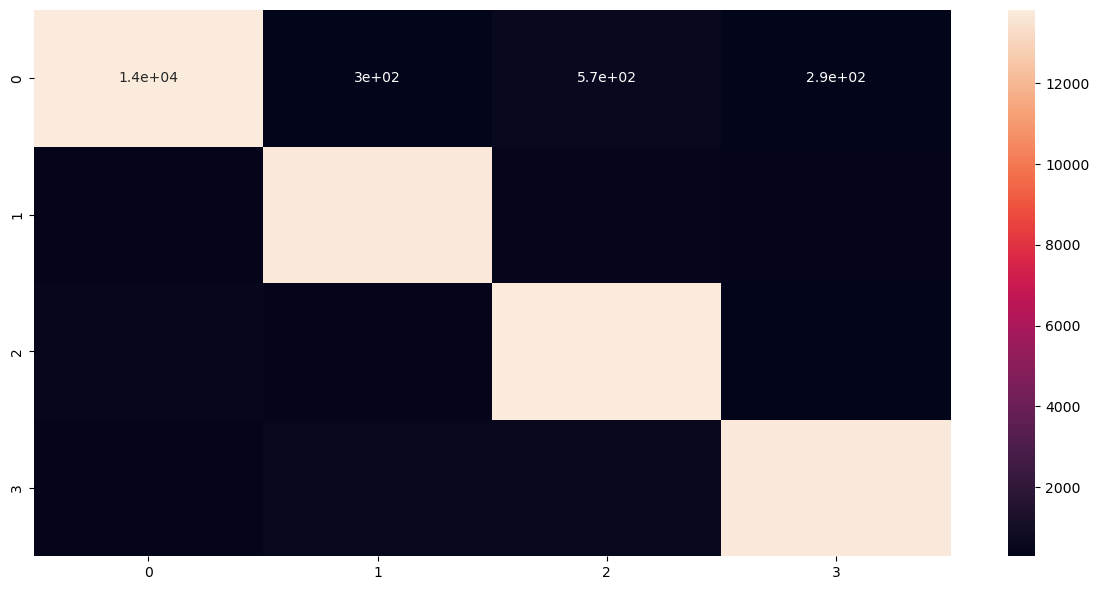

In [88]:
con = confusion_matrix(y_test,y_pre)
plt.figure(figsize=(12,6))
sns.heatmap(con,annot=True)
plt.tight_layout()

In [89]:
C = cross_validate(model,smo_x,smo_y,cv=7,return_train_score=True,scoring=('balanced_accuracy','precision_macro','recall_macro','roc_auc_ovo_weighted','roc_auc_ovr_weighted',"f1_macro"))
time = C["score_time"].mean()
print(f"The Time is : {time}")
tr_score = C["train_balanced_accuracy"].mean()
print(f"Train Score is : {tr_score}")
ts_score = C["test_balanced_accuracy"].mean()
print(f"Test Score is : {ts_score}")
precision_score = C["test_precision_macro"].mean()
print(f"Precision Score is : {precision_score}")
recall_score = C["test_recall_macro"].mean()
print(f"Recall Score is : {recall_score}")
f1_score = C["test_f1_macro"].mean()
print(f"F1 Score is : {f1_score}")
OVO_score = C["test_roc_auc_ovo_weighted"].mean()
print(f"One vs One Score is : {OVO_score}")
OVR_score = C["test_roc_auc_ovr_weighted"].mean()
print(f"One vs Rest Score is : {OVR_score}")

The Time is : 0.6321587903159005
Train Score is : 0.9793262315722059
Test Score is : 0.9113898468044631
Precision Score is : 0.9197112163390464
Recall Score is : 0.9113898468044631
F1 Score is : 0.9120760830028721
One vs One Score is : 0.9807343963974501
One vs Rest Score is : 0.9807343971246214


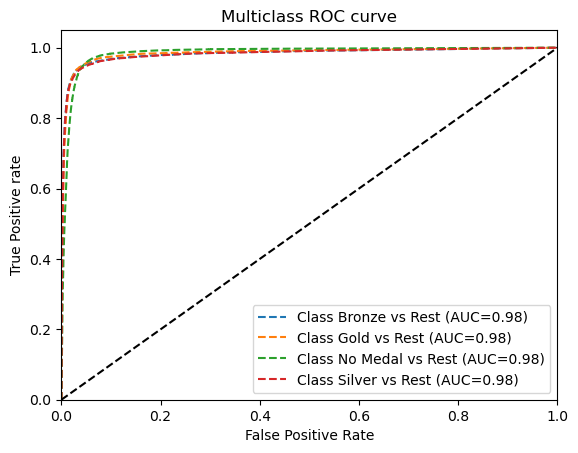

In [91]:
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
Rand=OneVsRestClassifier(RandomForestClassifier(n_estimators=45,n_jobs=-1))
Rand.fit(X_train,y_train)
y_pred =Rand.predict(X_test)
pred_prob = Rand.predict_proba(X_test)
classes=np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='Class %s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
plt.plot([0,1],[0,1],'k--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [92]:
model.fit(smo_x,smo_y)

RandomForestClassifier(n_estimators=45, n_jobs=-1)

In [93]:
importance = dict(zip(model.feature_names_in_,model.feature_importances_))
sorted(importance.items(),key=lambda x:x[1],reverse=True)

[('Age', 0.20332691544411602),
 ('Year', 0.16231716161092183),
 ('Height', 0.12020865794521376),
 ('Weight', 0.11401832570628843),
 ('BMI', 0.11271582493719955),
 ('Athletics', 0.017306889714086237),
 ('Sex', 0.015136414865196192),
 ('Swimming', 0.012229769359699891),
 ('Rowing', 0.01203492518562865),
 ('Gymnastics', 0.01116311902375673),
 ('Season', 0.010869476974395843),
 ('Cycling', 0.01081063733794994),
 ('Hockey', 0.010668179160261991),
 ('Fencing', 0.010592617543439322),
 ('Football', 0.009869735576654952),
 ('Shooting', 0.009382125757185915),
 ('Boxing', 0.00878791385297531),
 ('Sailing', 0.008658976939887151),
 ('Wrestling', 0.008365179805982934),
 ('Water Polo', 0.007855293667470448),
 ('Equestrianism', 0.007495909208411276),
 ('Canoeing', 0.007193151087114714),
 ('Basketball', 0.0065660042384841225),
 ('Handball', 0.006386911004184641),
 ('Diving', 0.005617592089546536),
 ('Ice Hockey', 0.0054282372025201715),
 ('Volleyball', 0.004932618657548457),
 ('Weightlifting', 0.004611